# Teleco customer churn prediction



### Dataset

1. **CustomerID**: Unique identifier for each customer.
2. **Count**: Possibly a count of some metrics (like total interactions or records) for the customer.
3. **Country**: The country where the customer is located.
4. **State**: The state within the country where the customer is located.
5. **City**: The city of the customer.
6. **Zip Code**: Postal code of the customer’s address.
7. **Lat Long**: Geographic coordinates (latitude and longitude) of the customer’s location.
8. **Latitude**: Latitude of the customer's location.
9. **Longitude**: Longitude of the customer's location.
10. **Gender**: Gender of the customer.
11. **Senior Citizen**: Indicator (often binary) of whether the customer is a senior citizen.
12. **Partner**: Indicates if the customer has a partner (often binary).
13. **Dependents**: Indicates if the customer has dependents (often binary).
14. **Tenure Months**: Duration of the customer's relationship with the company in months.
15. **Phone Service**: Indicates whether the customer has phone service (often binary).
16. **Multiple Lines**: Indicates if the customer has multiple lines (often binary).
17. **Internet Service**: Type of internet service provided to the customer.
18. **Online Security**: Indicates if the customer has online security (often binary).
19. **Online Backup**: Indicates if the customer has online backup (often binary).
20. **Device Protection**: Indicates if the customer has device protection (often binary).
21. **Tech Support**: Indicates if the customer has tech support (often binary).
22. **Streaming TV**: Indicates if the customer has streaming TV services (often binary).
23. **Streaming Movies**: Indicates if the customer has streaming movies services (often binary).
24. **Contract**: Type of contract the customer has (e.g., month-to-month, one year, two years).
25. **Paperless Billing**: Indicates if the customer uses paperless billing (often binary).
26. **Payment Method**: How the customer pays their bill (e.g., credit card, bank transfer).
27. **Monthly Charges**: Monthly fees charged to the customer.
28. **Total Charges**: Total amount charged to the customer over their tenure.
29. **Churn Label**: Label indicating whether the customer has churned (left the service).
30. **Churn Value**: Numeric representation of churn status (often binary).
31. **Churn Score**: Score that quantifies the likelihood of a customer churning.
32. **CLTV**: Customer Lifetime Value, representing the total revenue expected from the customer over their lifetime.
33. **Churn Reason**: Reason for the customer's churn, if applicable.



### How to Calculate CLTV

1. **Average Purchase Value (APV)**: Calculate the average amount spent by a customer per transaction.
  
   APV= 
Number of Purchases/
Total Revenue
​

2. **Average Purchase Frequency Rate (APFR)**: Calculate how often a customer makes a purchase within a given timeframe.
   
   APFR= 
Number of Unique Customers/
Number of Purchases
​
 


3. **Customer Value (CV)**: Multiply the APV by the APFR to find the average customer value over a specified period.
  
   CV=APV×APFR


4. **Average Customer Lifespan (ACL)**: Determine the average length of time a customer remains active.
  
5. **CLTV Calculation**: Finally, multiply the customer value by the average customer lifespan.
   
   CLTV=CV×ACL


In [4]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("C:\\Users\\Sujan.S\\OneDrive\\Desktop\\Telco_customer_churn.csv")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [7]:
print(len(df))

7043


In [6]:
df.shape

(7043, 33)

In [7]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

 univariate analysis of numerical and categorical features in a customer churn dataset. For numerical features such as `Tenure Months`, `Monthly Charges`, `Total Charges`, `Churn Score`, and `CLTV`, it generates histograms with Kernel Density Estimate (KDE) overlays to visualize the distribution of values, helping to identify patterns and spread. For categorical features, including `Gender`, `Senior Citizen`, `Partner`, and several service-related variables, it creates count plots that display the frequency of each category, along with printed counts of customers in each category using the `value_counts()` method. This comprehensive analysis aids in understanding customer demographics and behavior, which is vital for making informed business decisions, especially regarding churn management.

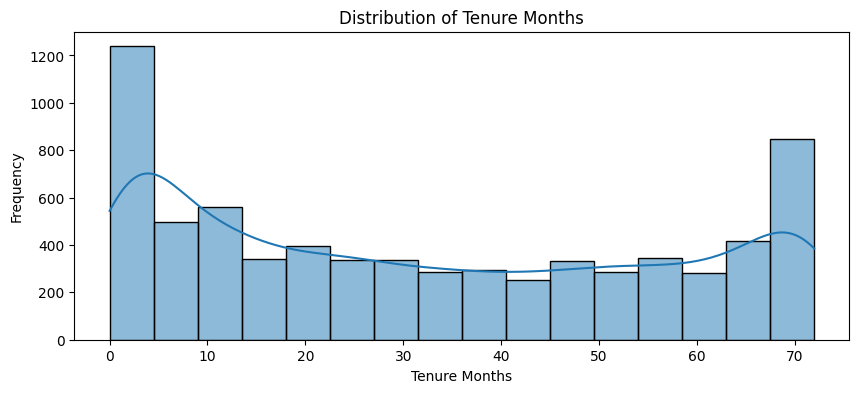

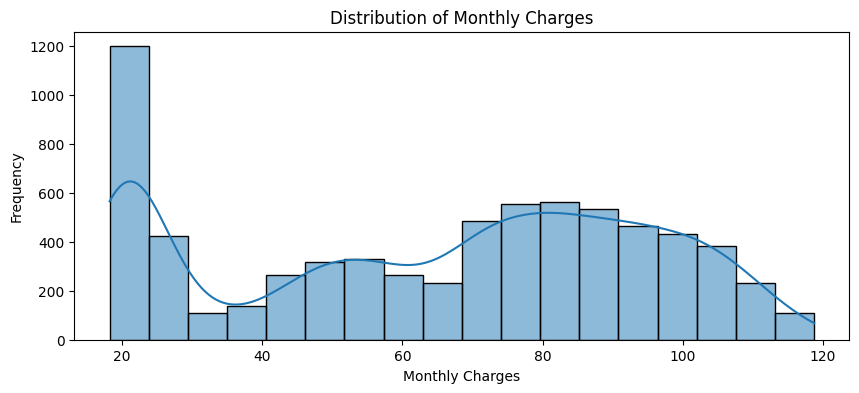

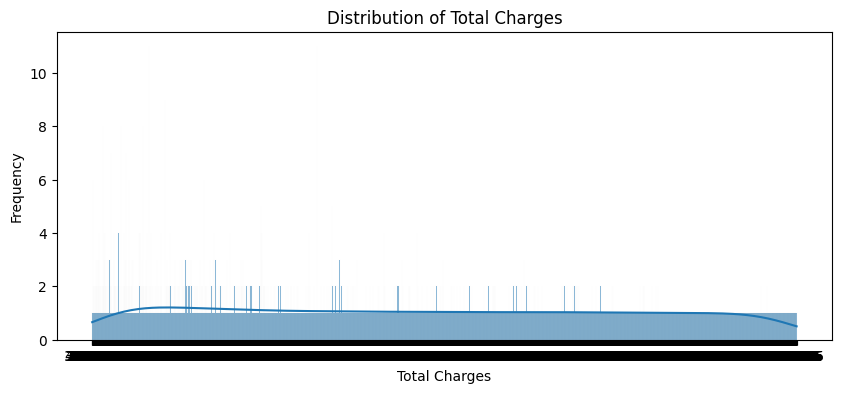

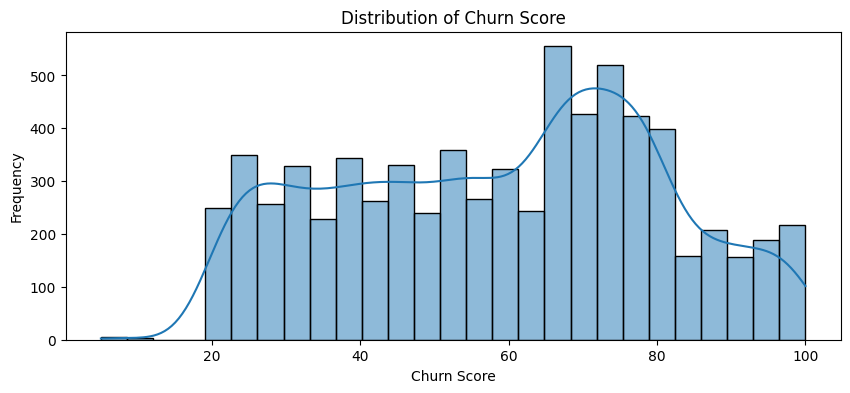

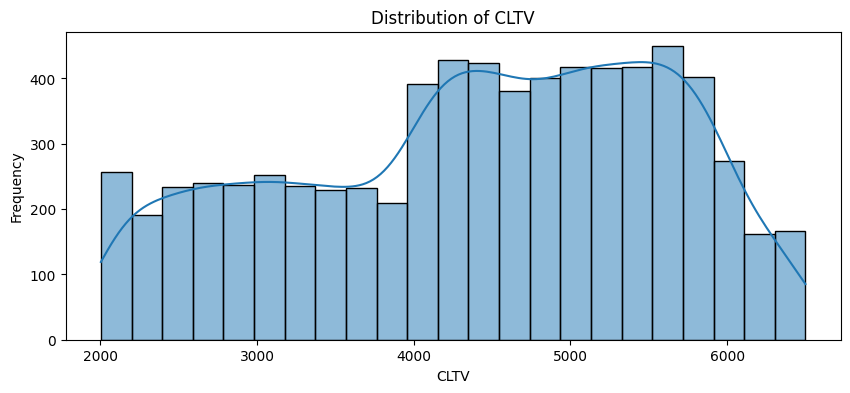

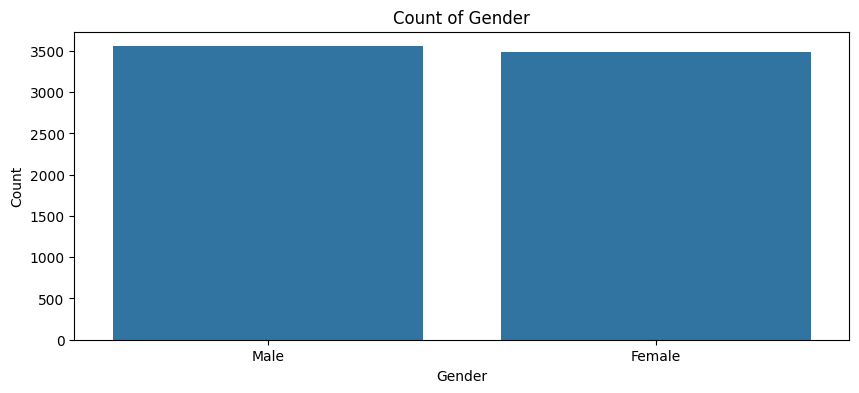

Count of customers for Gender:
Gender
Male      3555
Female    3488
Name: count, dtype: int64



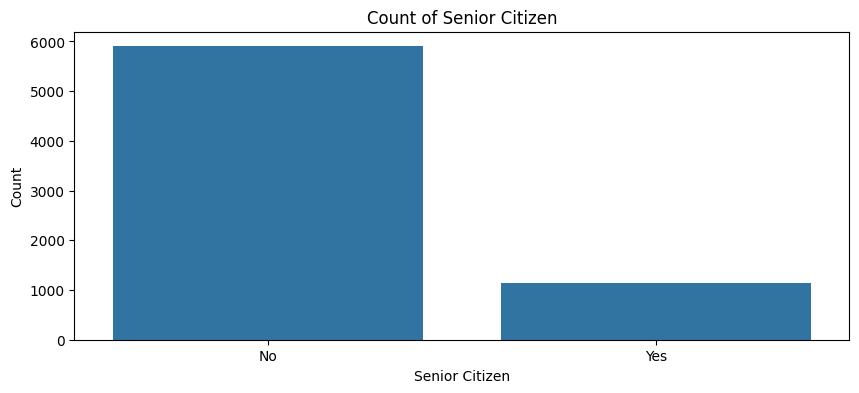

Count of customers for Senior Citizen:
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64



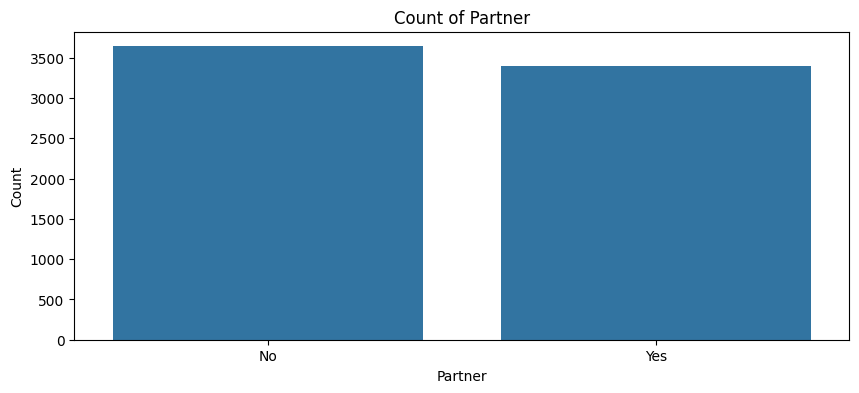

Count of customers for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64



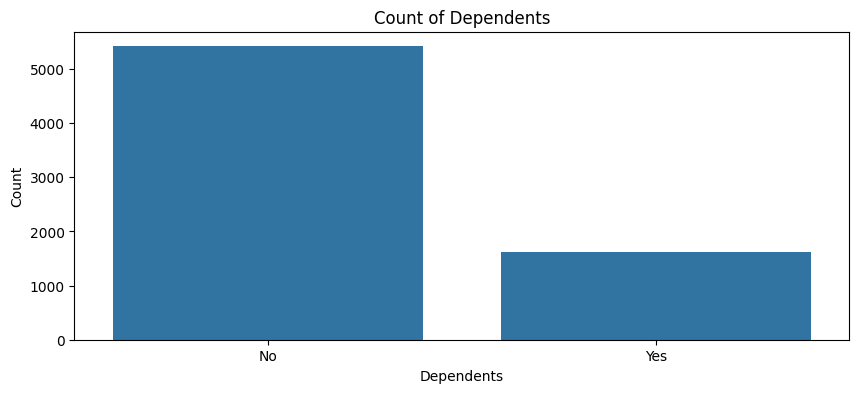

Count of customers for Dependents:
Dependents
No     5416
Yes    1627
Name: count, dtype: int64



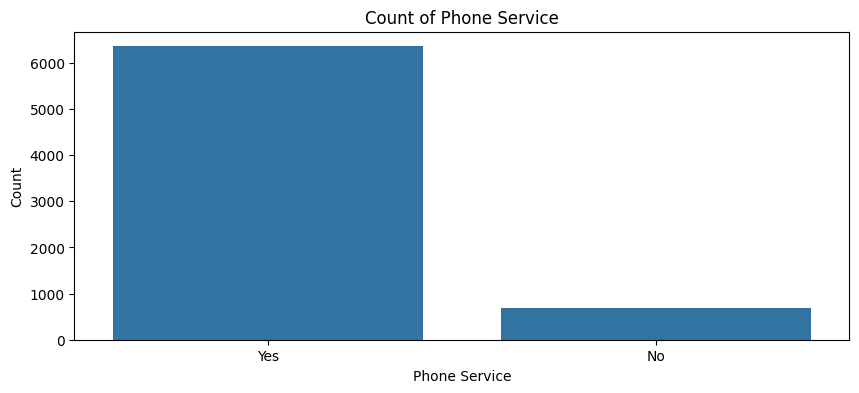

Count of customers for Phone Service:
Phone Service
Yes    6361
No      682
Name: count, dtype: int64



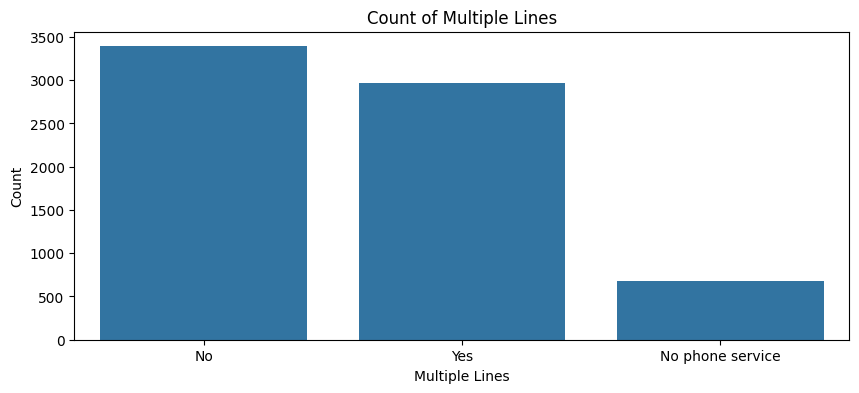

Count of customers for Multiple Lines:
Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64



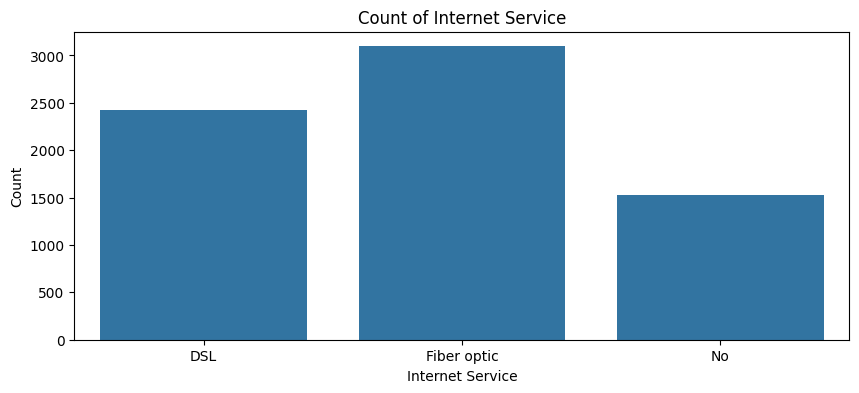

Count of customers for Internet Service:
Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64



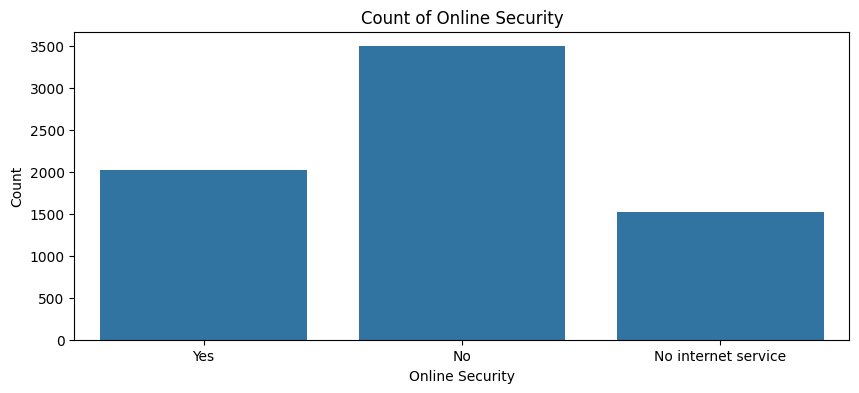

Count of customers for Online Security:
Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64



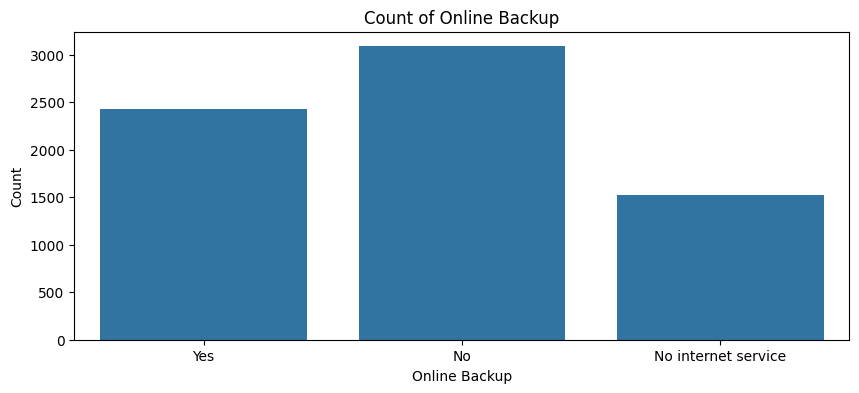

Count of customers for Online Backup:
Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64



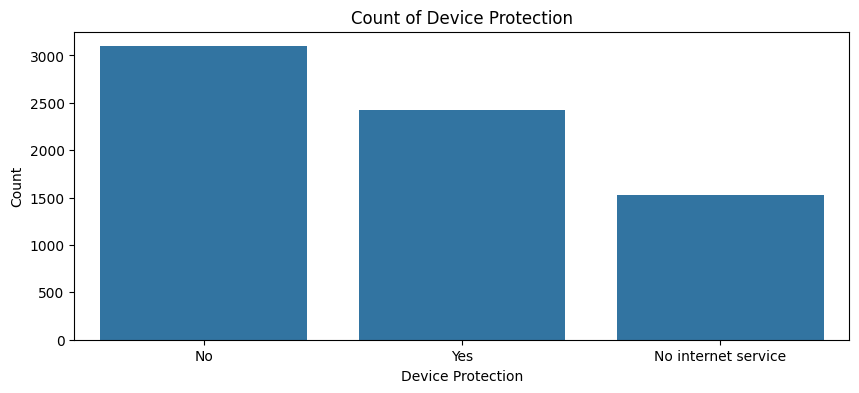

Count of customers for Device Protection:
Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64



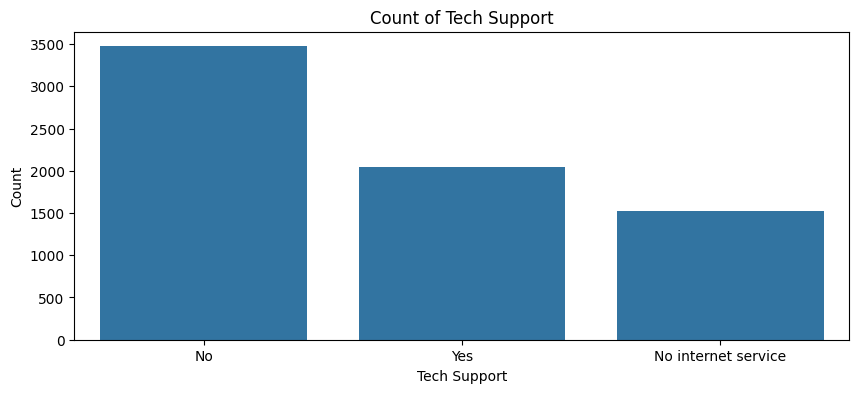

Count of customers for Tech Support:
Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64



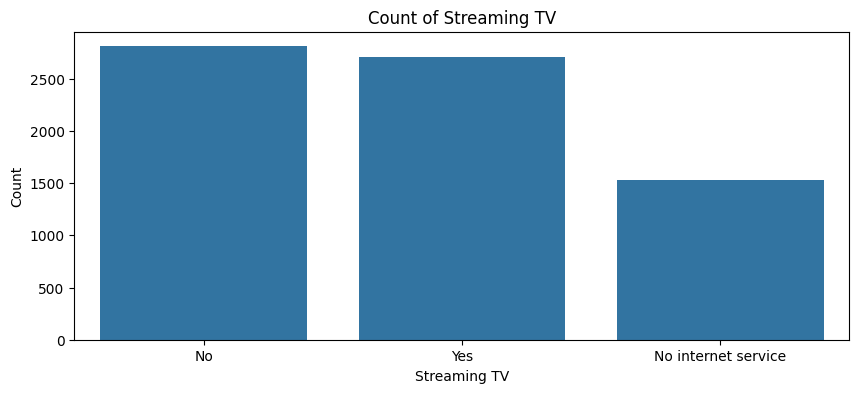

Count of customers for Streaming TV:
Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64



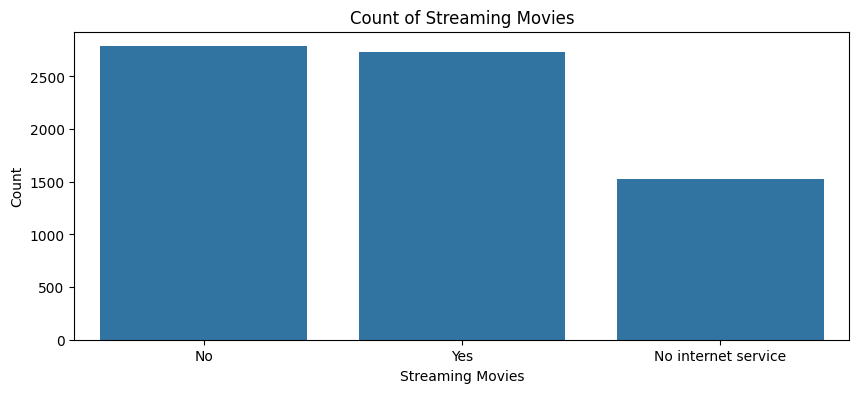

Count of customers for Streaming Movies:
Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64



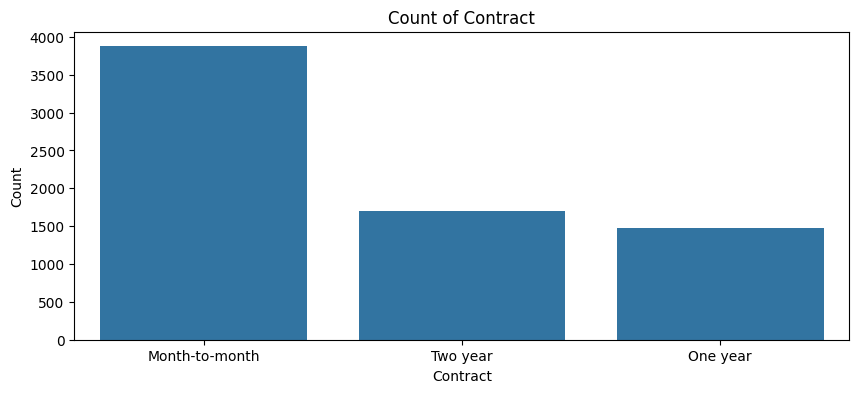

Count of customers for Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64



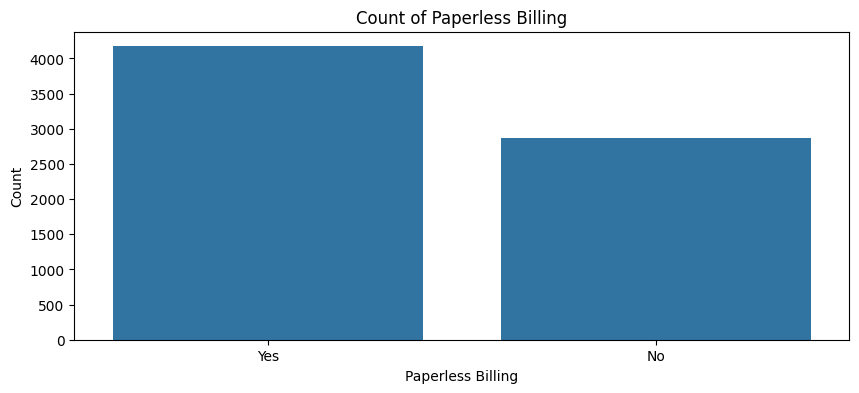

Count of customers for Paperless Billing:
Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64



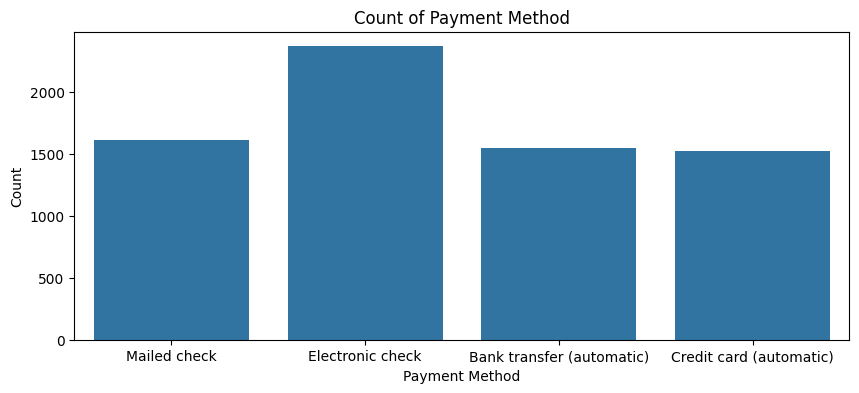

Count of customers for Payment Method:
Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64



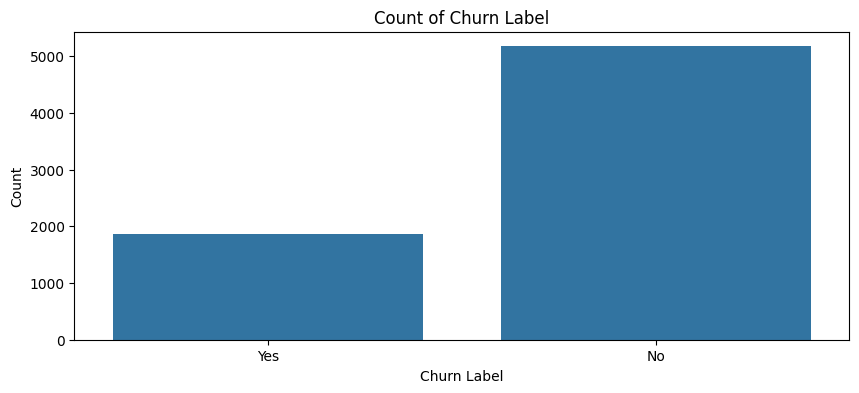

Count of customers for Churn Label:
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis of numerical features
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis of categorical features
categorical_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
                        'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 
                        'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
                        'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    
    # Print the count of customers for each category
    counts = df[feature].value_counts()
    print(f'Count of customers for {feature}:\n{counts}\n')


bivariate analysis to examine the relationship between various features and the target variable, `Churn Label`. For numerical features, it creates box plots that display the distribution of each numerical variable against the churn status, allowing for comparison of medians and spread between customers who churned and those who did not. For categorical features, except for `Churn Label`, it generates count plots that show the frequency of each category while differentiating between churned and non-churned customers using color coding. This analysis helps identify patterns and potential correlations between features and customer churn, providing valuable insights for decision-making.

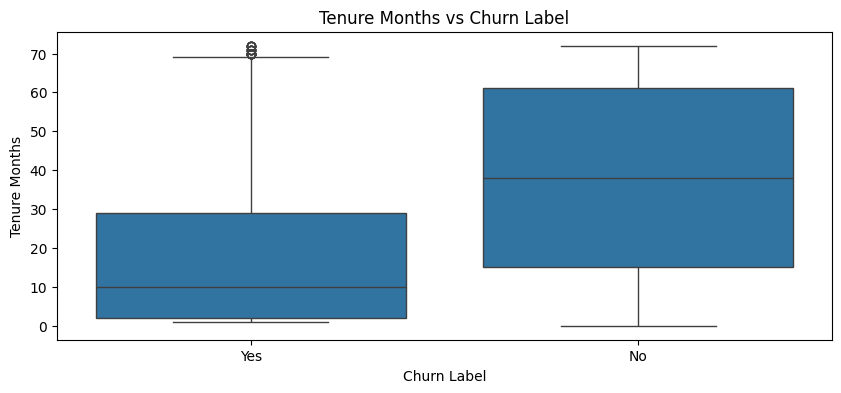

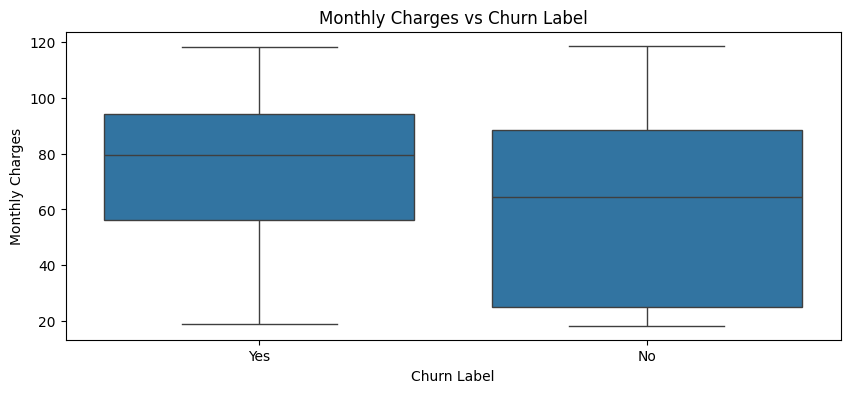

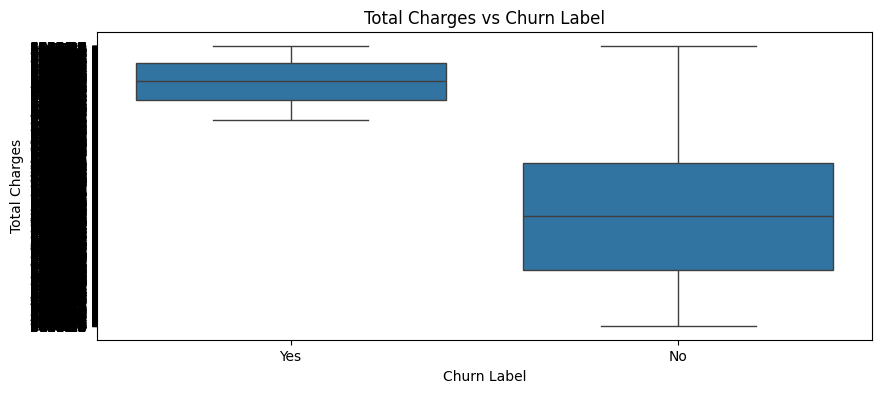

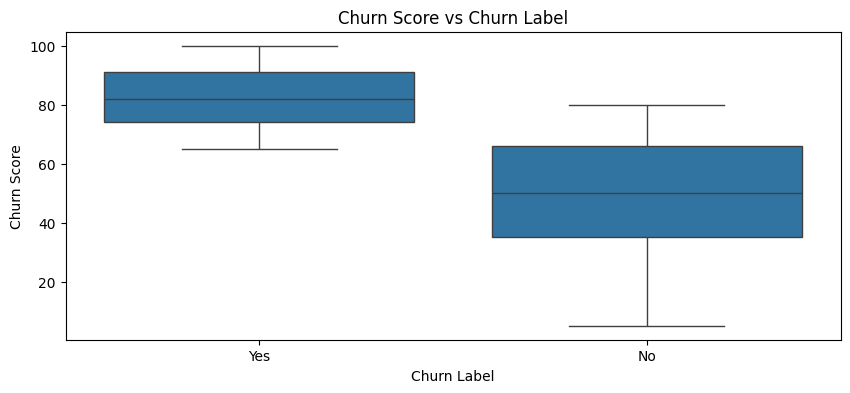

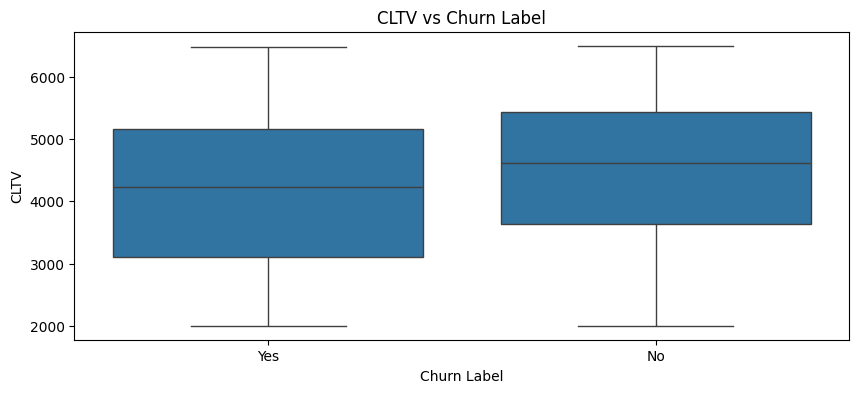

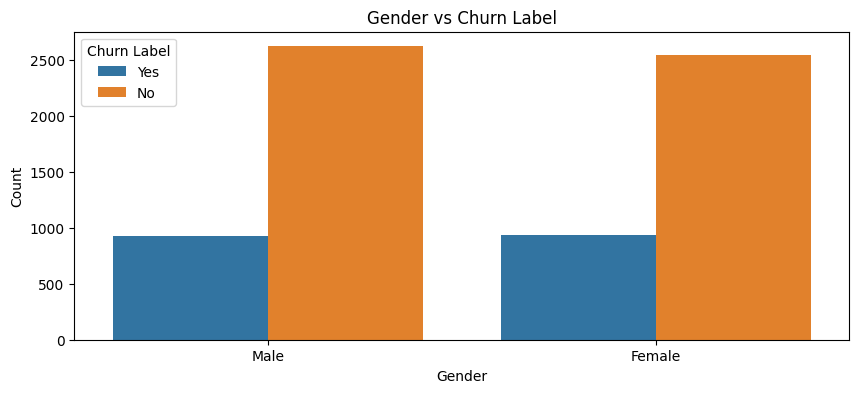

Count of customers for Gender by Churn Label:
Churn Label    No  Yes
Gender                
Female       2549  939
Male         2625  930



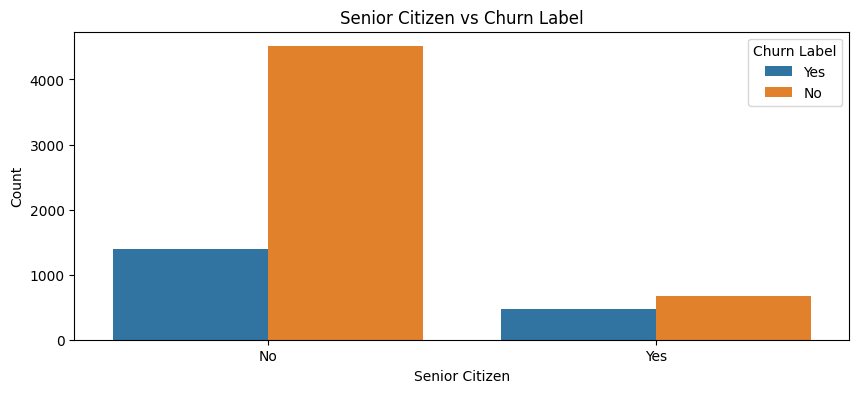

Count of customers for Senior Citizen by Churn Label:
Churn Label       No   Yes
Senior Citizen            
No              4508  1393
Yes              666   476



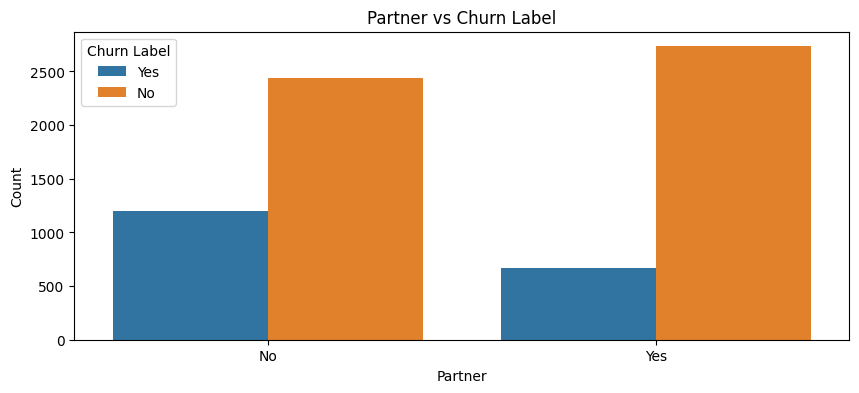

Count of customers for Partner by Churn Label:
Churn Label    No   Yes
Partner                
No           2441  1200
Yes          2733   669



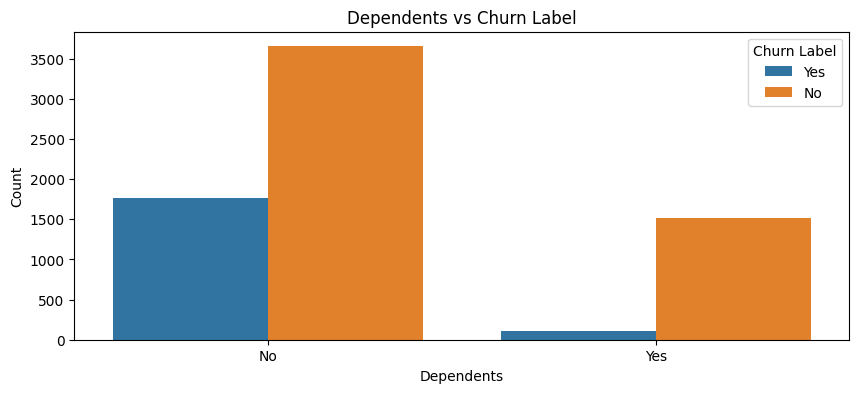

Count of customers for Dependents by Churn Label:
Churn Label    No   Yes
Dependents             
No           3653  1763
Yes          1521   106



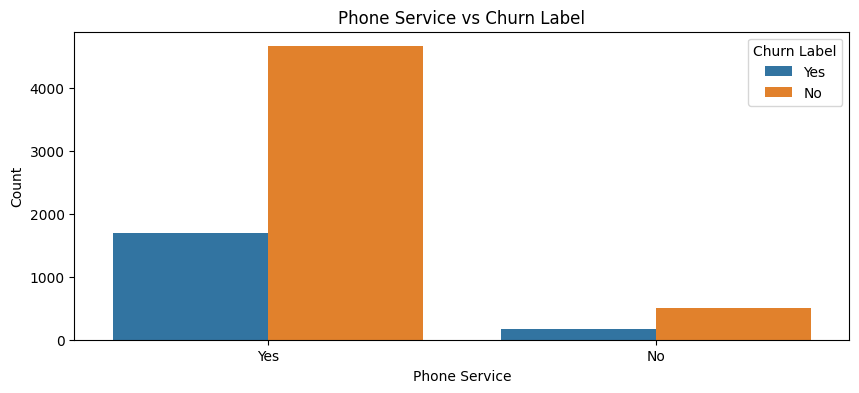

Count of customers for Phone Service by Churn Label:
Churn Label      No   Yes
Phone Service            
No              512   170
Yes            4662  1699



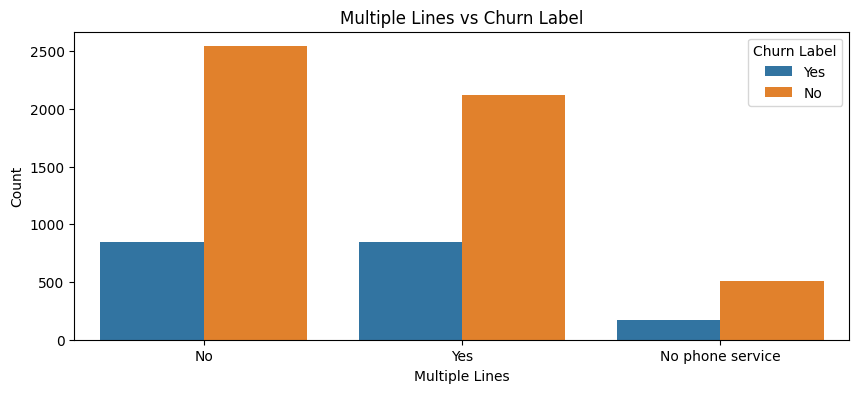

Count of customers for Multiple Lines by Churn Label:
Churn Label         No  Yes
Multiple Lines             
No                2541  849
No phone service   512  170
Yes               2121  850



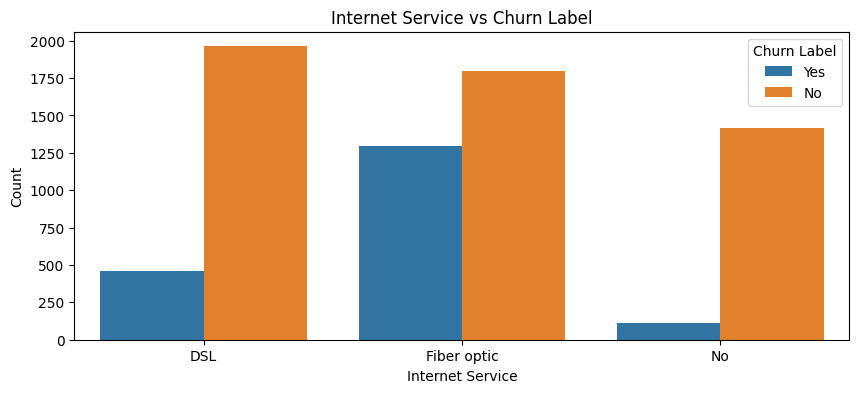

Count of customers for Internet Service by Churn Label:
Churn Label         No   Yes
Internet Service            
DSL               1962   459
Fiber optic       1799  1297
No                1413   113



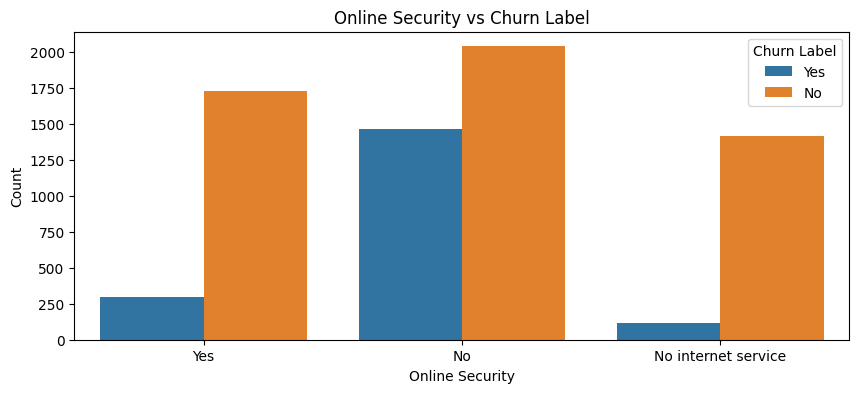

Count of customers for Online Security by Churn Label:
Churn Label            No   Yes
Online Security                
No                   2037  1461
No internet service  1413   113
Yes                  1724   295



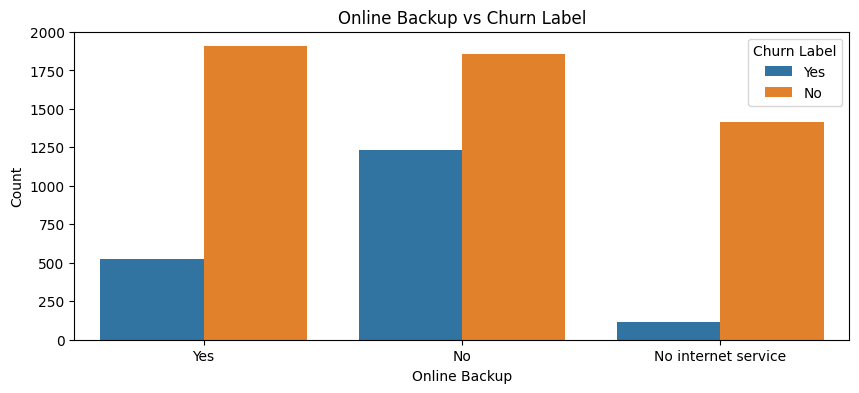

Count of customers for Online Backup by Churn Label:
Churn Label            No   Yes
Online Backup                  
No                   1855  1233
No internet service  1413   113
Yes                  1906   523



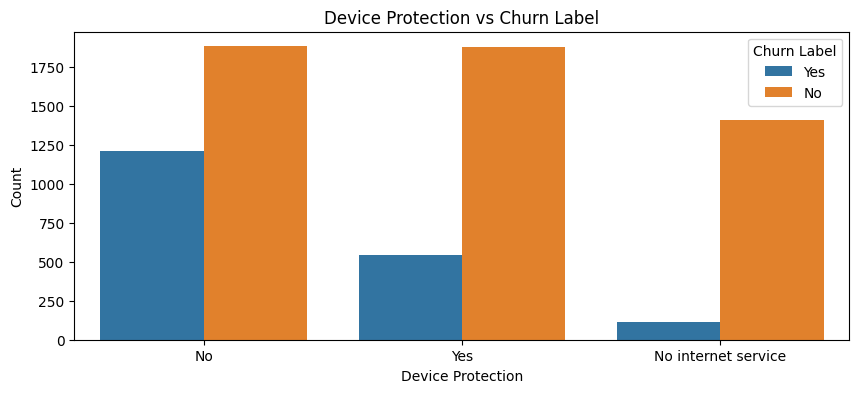

Count of customers for Device Protection by Churn Label:
Churn Label            No   Yes
Device Protection              
No                   1884  1211
No internet service  1413   113
Yes                  1877   545



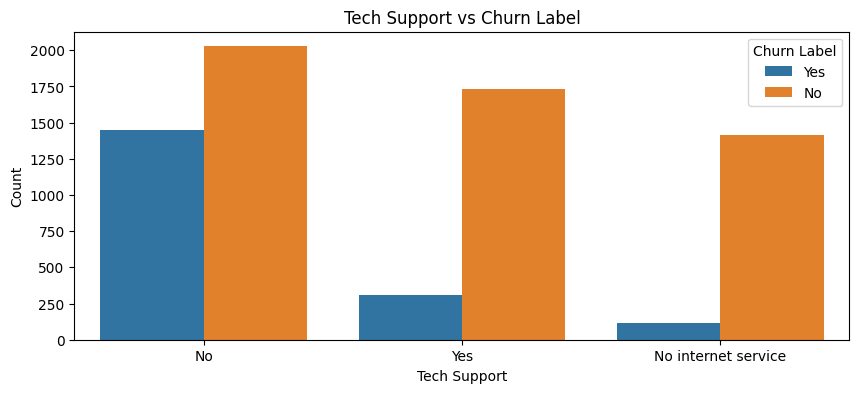

Count of customers for Tech Support by Churn Label:
Churn Label            No   Yes
Tech Support                   
No                   2027  1446
No internet service  1413   113
Yes                  1734   310



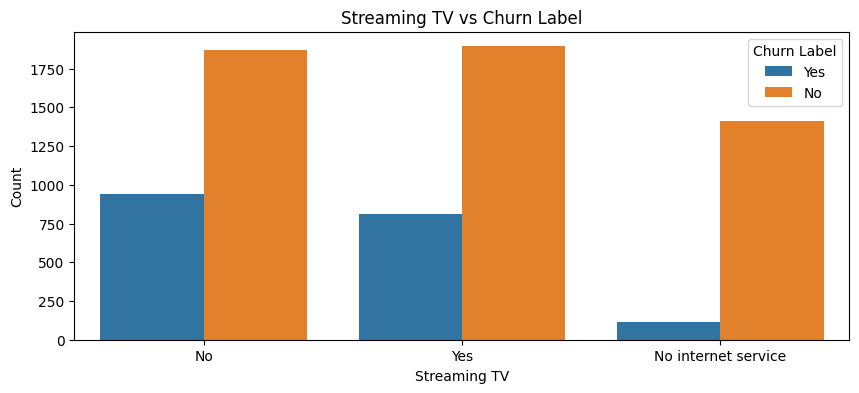

Count of customers for Streaming TV by Churn Label:
Churn Label            No  Yes
Streaming TV                  
No                   1868  942
No internet service  1413  113
Yes                  1893  814



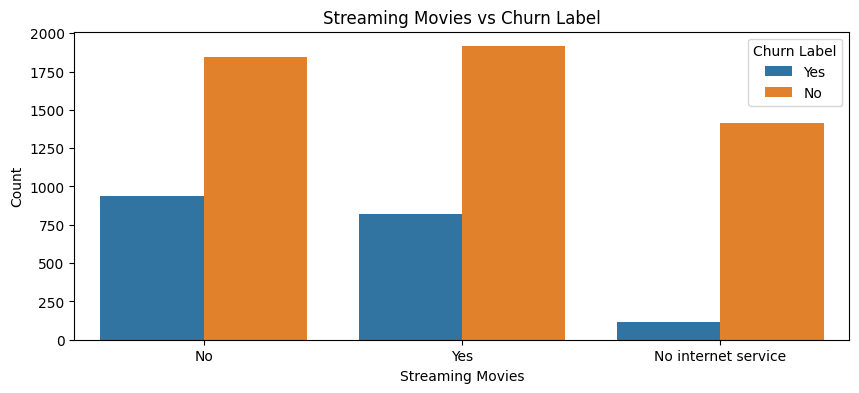

Count of customers for Streaming Movies by Churn Label:
Churn Label            No  Yes
Streaming Movies              
No                   1847  938
No internet service  1413  113
Yes                  1914  818



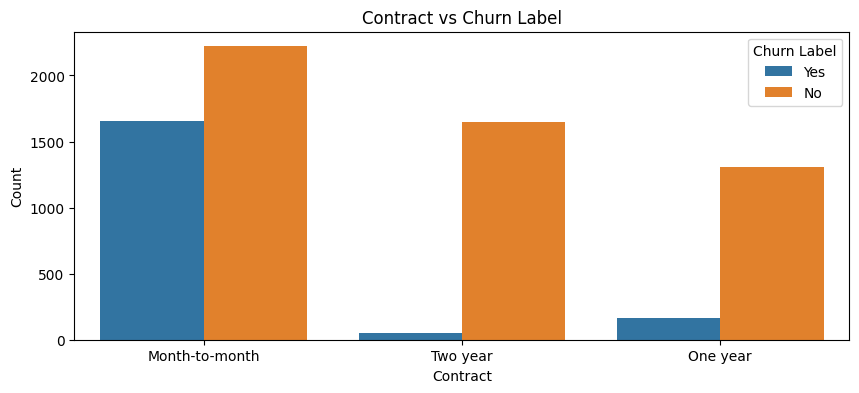

Count of customers for Contract by Churn Label:
Churn Label       No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48



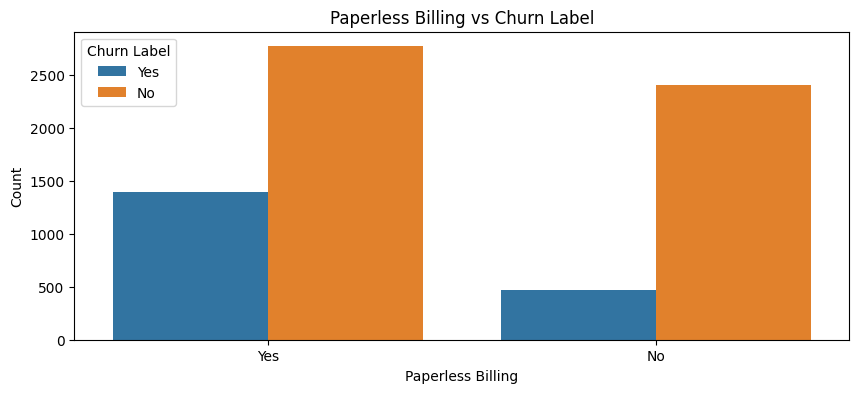

Count of customers for Paperless Billing by Churn Label:
Churn Label          No   Yes
Paperless Billing            
No                 2403   469
Yes                2771  1400



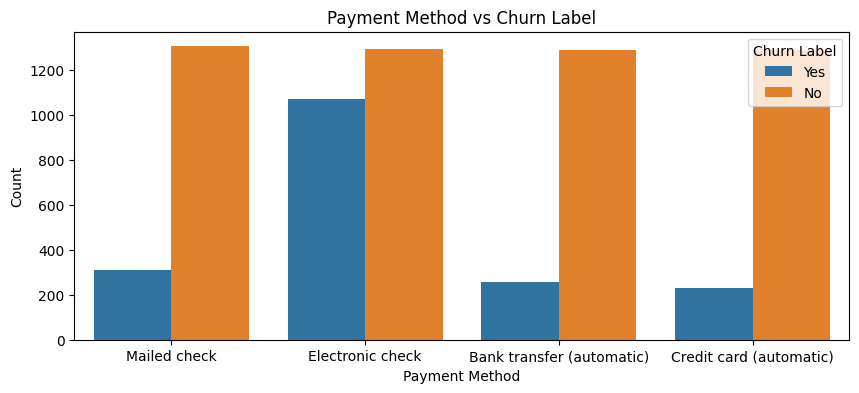

Count of customers for Payment Method by Churn Label:
Churn Label                  No   Yes
Payment Method                       
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308



In [12]:
# Bivariate analysis of numerical features against the target variable
target_variable = 'Churn Label'

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=target_variable, y=feature, data=df)
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.show()

# Bivariate analysis of categorical features against the target variable
for feature in categorical_features:
    if feature != 'Churn Label':
        plt.figure(figsize=(10, 4))
        sns.countplot(x=feature, hue=target_variable, data=df)
        plt.title(f'{feature} vs {target_variable}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()
        
        # Print the count of customers for each category against the target variable
        counts = df.groupby([feature, target_variable]).size().unstack(fill_value=0)
        print(f'Count of customers for {feature} by {target_variable}:\n{counts}\n')


 heatmap to visualize correlations between numerical features in the dataset. First, it selects only the numeric columns from the data, then calculates a correlation matrix, which shows how strongly each pair of features is related (values range from -1 for a perfect negative correlation to 1 for a perfect positive correlation, with 0 indicating no correlation). Finally, it plots the correlation matrix as a color-coded heatmap, where each cell shows the correlation value, allowing you to quickly spot strong positive or negative relationships among features.

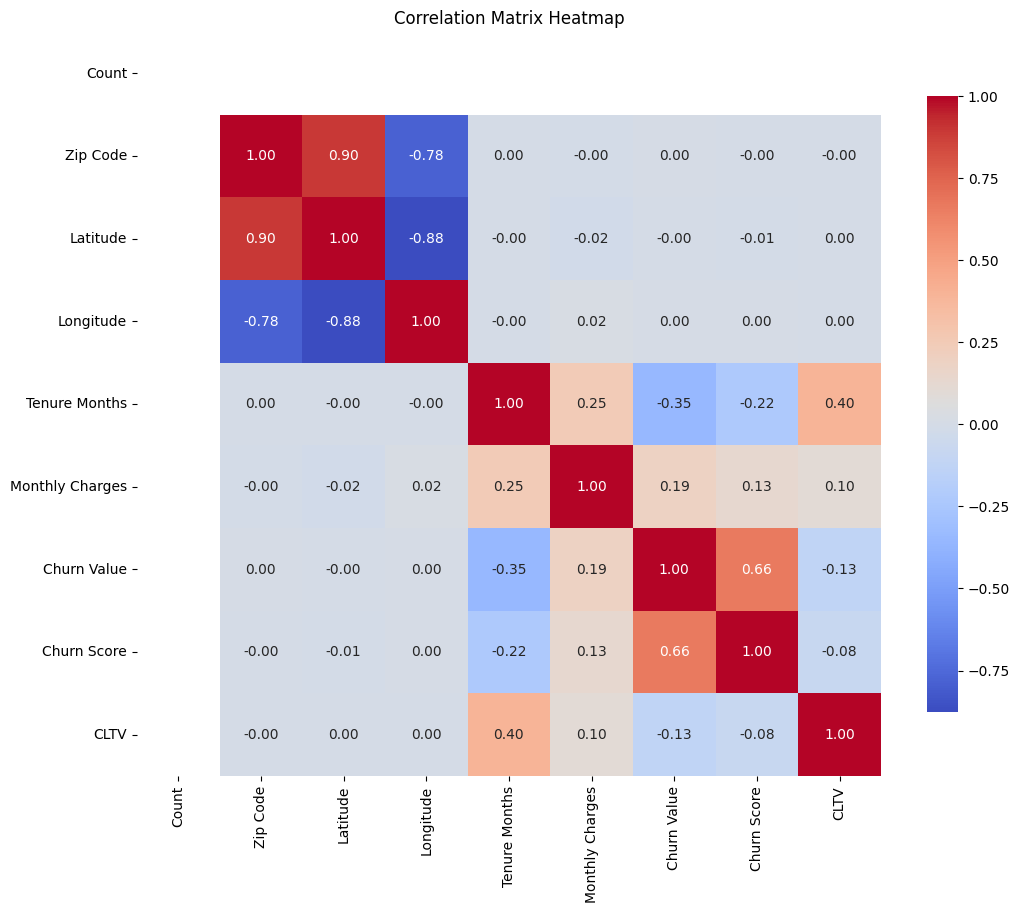

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Matrix Heatmap")
plt.show()


cleaning the dataset by removing columns with a high percentage of missing values. It first sets a threshold (in this case, 30%) to determine the maximum allowable percentage of null values for each feature. Then, it calculates the percentage of null values for each column and identifies the columns that exceed this threshold. These columns are dropped from the dataset to create a cleaner version, `df_cleaned`, with fewer missing values. Finally, it prints the list of dropped features and the new shape of the cleaned dataset, showing how many columns remain after cleaning.

In [12]:
# Set the threshold for the maximum percentage of null values allowed
threshold = 0.3  # For example, allowing 10% or less null values

# Calculate the percentage of null values for each feature
null_percentage = df.isnull().mean()

# Drop features that exceed the threshold
features_to_drop = null_percentage[null_percentage > threshold].index
df_cleaned = df.drop(columns=features_to_drop)

# Display the cleaned dataset and the dropped features
print("Dropped features:", features_to_drop.tolist())
print("Shape of cleaned dataset:", df_cleaned.shape)

Dropped features: ['Churn Reason']
Shape of cleaned dataset: (7043, 32)



1. **Multicollinearity Reduction**: The `drop_high_vif_features` function iteratively calculates the Variance Inflation Factor (VIF) for each feature. If a feature’s VIF exceeds a given threshold (set to 5 here), it’s removed, helping to eliminate multicollinear features until only 15 remain. VIF helps identify features that are highly correlated with each other, and by removing these, we reduce redundancy.

2. **Define Target and Features**: After removing multicollinear features, the code defines the features (`X`) and target variable (`y`), with the target variable assumed to be `Churn Value`.

3. **Recursive Feature Elimination (RFE)**: Using logistic regression as the estimator, RFE selects the top features that best predict the target variable. Here, it’s configured to select 10 features, but this number can be adjusted as needed.

4. **Output Selected Features**: Finally, it displays the selected features, which represent the most informative subset of the original features, further improving model efficiency and potentially enhancing predictive performance.

In [13]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Function to calculate VIF and drop features with the highest VIF until only 15 features remain
def drop_high_vif_features(X, threshold=5, target_feature_count=15):
    while True:
        vif = pd.DataFrame()
        vif["Features"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Stop if we have reached the desired number of features
        if X.shape[1] <= target_feature_count:
            break

        # Check if any VIF is above the threshold
        if vif["VIF"].max() > threshold:
            # Get the feature with the highest VIF
            feature_to_drop = vif.loc[vif["VIF"].idxmax(), "Features"]
            print(f"Dropping feature: {feature_to_drop} with VIF: {vif['VIF'].max()}")
            # Drop the feature
            X = X.drop(columns=[feature_to_drop])
        else:
            break
    return X

# Extract numeric features from the original dataframe
numeric_features = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_features]

# Step 1: Remove multicollinear features
cleaned_df = drop_high_vif_features(numeric_df)
print("Shape of cleaned dataset after removing multicollinear features:", cleaned_df.shape)

# Step 2: Define target and feature variables
X = cleaned_df.drop(columns=['Churn Value'])  # Assuming 'churn' is the target variable
y = df['Churn Value']

# Step 3: Apply RFE to select top features
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)  # Adjust n_features_to_select as needed
rfe = rfe.fit(X, y)

# Step 4: Get selected features
selected_features = X.columns[rfe.support_]
selected_features_df = pd.DataFrame({'Selected Feature': selected_features})

print("Selected features:\n", selected_features_df)


Shape of cleaned dataset after removing multicollinear features: (7043, 9)
Selected features:
   Selected Feature
0            Count
1         Zip Code
2         Latitude
3        Longitude
4    Tenure Months
5  Monthly Charges
6      Churn Score
7             CLTV


removes outliers from numerical columns using the Interquartile Range (IQR) method. For each numeric column, it calculates the IQR by finding the 25th (Q1) and 75th (Q3) percentiles, then defines outlier bounds as 1.5 times the IQR below Q1 and above Q3. Rows with values outside these bounds are removed. As each column's outliers are filtered out, the code prints the remaining dataset's shape, giving insight into how many rows were retained. This approach helps maintain data integrity by removing extreme values that could distort analysis or model results.

In [14]:
import pandas as pd

# Function to remove outliers based on the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtering the dataset
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"Outliers removed from {col}. Remaining data shape: {df.shape}")
    return df

# Example usage
numeric_columns = df.select_dtypes(include=['number']).columns  # Select numeric columns
df_no_outliers = remove_outliers(df, numeric_columns)

print("Shape of dataset after outlier removal:", df_no_outliers.shape)


Outliers removed from Count. Remaining data shape: (7043, 33)
Outliers removed from Zip Code. Remaining data shape: (7043, 33)
Outliers removed from Latitude. Remaining data shape: (7043, 33)
Outliers removed from Longitude. Remaining data shape: (7043, 33)
Outliers removed from Tenure Months. Remaining data shape: (7043, 33)
Outliers removed from Monthly Charges. Remaining data shape: (7043, 33)
Outliers removed from Churn Value. Remaining data shape: (7043, 33)
Outliers removed from Churn Score. Remaining data shape: (7043, 33)
Outliers removed from CLTV. Remaining data shape: (7043, 33)
Shape of dataset after outlier removal: (7043, 33)


to handle class imbalance for a classification task by applying SMOTE (Synthetic Minority Over-sampling Technique).

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


print(df.columns)  # Check column names

# Drop the actual customer ID column and any other non-numeric features
df_cleaned = df.drop(columns=['CustomerID'])  # Adjust this to match your actual ID column

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])  # Replace 'Churn Value' with the actual target column
y = df_cleaned['Churn Value']  # Replace with actual target column

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')
Class distribution before SMOTE:
Churn Value
0    3649
1    1281
Name: count, dtype: int64
Class distribution after SMOTE:
Churn Value
1    3649
0    3649
Name: count, dtype: int64


In [16]:
df['City'].value_counts()

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

## logistic regression model 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with regularization and class balancing
model = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l2')
model.fit(X_train, y_train)

# Cross-validation to check for overfitting
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Evaluate on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Cross-validation scores: [0.99792961 1.         0.99861974 0.99792818 0.99861878]
Mean CV accuracy: 0.9986192611402795

Model Evaluation Metrics on Test Set:
Accuracy: 0.9990338164251208
Precision: 1.0
Recall: 0.9980645161290322
F1 Score: 0.9990313206328705
Confusion Matrix:
 [[1555    0]
 [   3 1547]]


## Naive Bayes classifier

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional for Naive Bayes, but included here for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Cross-validation to check for overfitting
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Evaluate on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)



Cross-validation scores: [0.75659229 0.76876268 0.7494929  0.81440162 0.79310345]
Mean CV accuracy: 0.7764705882352941

Model Evaluation Metrics on Test Set:
Accuracy: 0.8116422148603881
Precision: 0.7111111111111111
Recall: 0.54421768707483
F1 Score: 0.6165703275529865
Confusion Matrix:
 [[1395  130]
 [ 268  320]]


## Gaussian Naive Bayes model


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Assuming df_cleaned is your cleaned DataFrame with necessary preprocessing
# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional for Gaussian Naive Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Cross-validation to check for overfitting
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Cross-validation scores: [0.75659229 0.76876268 0.7494929  0.81440162 0.79310345]
Mean CV accuracy: 0.7764705882352941

Model Evaluation Metrics on Test Set:
Accuracy: 0.8116422148603881
Precision: 0.7111111111111111
Recall: 0.54421768707483
F1 Score: 0.6165703275529865
Confusion Matrix:
 [[1395  130]
 [ 268  320]]


##  Decision Tree classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional for Decision Trees)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning with Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Cross-validation to check for overfitting
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation scores: [0.88843813 0.94016227 0.96247465 0.98275862 0.99087221]
Mean CV accuracy: 0.9529411764705882

Model Evaluation Metrics on Test Set:
Accuracy: 0.9640321817321345
Precision: 0.9571428571428572
Recall: 0.9115646258503401
F1 Score: 0.9337979094076655
Confusion Matrix:
 [[1501   24]
 [  52  536]]


## Random Forest classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (not always necessary for Random Forest, but can be done)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics on Training Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("Confusion Matrix:\n", train_conf_matrix)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("Confusion Matrix:\n", test_conf_matrix)

# Check for overfitting
if train_accuracy > test_accuracy:
    print("\nThe model may be overfitting.")
else:
    print("\nThe model is not overfitting.")



Model Evaluation Metrics on Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[3649    0]
 [   0 1281]]

Model Evaluation Metrics on Test Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1525    0]
 [   0  588]]

The model is not overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (not always necessary for Random Forest, but can be beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier with overfitting prevention parameters
model = RandomForestClassifier(
    n_estimators=100,              # Number of trees
    max_depth=10,                  # Limit depth to prevent overfitting
    min_samples_split=10,          # Minimum samples required to split an internal node
    min_samples_leaf=5,            # Minimum samples required to be at a leaf node
    max_features='sqrt',           # Randomly select subset of features at each split
    random_state=42
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate overall accuracy
overall_accuracy = (train_accuracy + test_accuracy) / 2

# Print evaluation metrics
print("\nModel Evaluation Metrics on Training Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("Confusion Matrix:\n", train_conf_matrix)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("Confusion Matrix:\n", test_conf_matrix)

print("\nOverall Model Accuracy:", overall_accuracy)

# Check for overfitting
if train_accuracy > test_accuracy:
    print("\nThe model may be overfitting.")
else:
    print("\nThe model is not overfitting.")



Model Evaluation Metrics on Training Set:
Accuracy: 0.7403651115618661
Precision: 1.0
Recall: 0.00078064012490242
F1 Score: 0.0015600624024961
Confusion Matrix:
 [[3649    0]
 [1280    1]]

Model Evaluation Metrics on Test Set:
Accuracy: 0.7221959299574066
Precision: 1.0
Recall: 0.0017006802721088435
F1 Score: 0.003395585738539898
Confusion Matrix:
 [[1525    0]
 [ 587    1]]

Overall Model Accuracy: 0.7312805207596363

The model may be overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (optional for Random Forest but useful if comparing other models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reduced hyperparameter grid for faster grid search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [5, 10],
    'max_features': ['sqrt']
}

# Set up GridSearchCV with minimal cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1', cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set with multiple metrics
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}

Model Evaluation Metrics on Test Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1552    0]
 [   0  561]]


## Multi-Layer Perceptron (MLP)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                      learning_rate='adaptive', max_iter=500, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics on Training Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("Confusion Matrix:\n", train_conf_matrix)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("Confusion Matrix:\n", test_conf_matrix)

# Check for overfitting
if train_accuracy > test_accuracy:
    print("\nThe model may be overfitting.")
else:
    print("\nThe model is not overfitting.")



Model Evaluation Metrics on Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[3649    0]
 [   0 1281]]

Model Evaluation Metrics on Test Set:
Accuracy: 0.7449124467581637
Precision: 0.64
Recall: 0.19047619047619047
F1 Score: 0.29357798165137616
Confusion Matrix:
 [[1462   63]
 [ 476  112]]

The model may be overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter grid for MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300]  # Set a reasonable iteration limit for faster training
}

# Grid search with minimal cross-validation for speed
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, scoring='f1', cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set with multiple metrics
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}

Model Evaluation Metrics on Test Set:
Accuracy: 0.7557974443918599
Precision: 0.6285714285714286
Recall: 0.19607843137254902
F1 Score: 0.29891304347826086
Confusion Matrix:
 [[1487   65]
 [ 451  110]]


## Support Vector Machine (SVM) classifier 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42))  # You can adjust C and kernel
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics on Training Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("Confusion Matrix:\n", train_conf_matrix)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("Confusion Matrix:\n", test_conf_matrix)

# Check for overfitting
if train_accuracy > test_accuracy:
    print("\nThe model may be overfitting.")
else:
    print("\nThe model is not overfitting.")



Model Evaluation Metrics on Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[3649    0]
 [   0 1281]]

Model Evaluation Metrics on Test Set:
Accuracy: 0.9602460955986749
Precision: 0.9701492537313433
Recall: 0.8843537414965986
F1 Score: 0.9252669039145908
Confusion Matrix:
 [[1509   16]
 [  68  520]]

The model may be overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier with parameters to reduce overfitting
model = SVC(kernel='rbf',              # Radial basis function kernel
            C=1.0,                    # Regularization parameter; larger values can lead to overfitting
            gamma='scale',            # Default value; controls the influence of a single training example
            random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)




Model Evaluation Metrics on Test Set:
Accuracy: 0.9583530525319451
Precision: 0.9592233009708738
Recall: 0.8805704099821747
F1 Score: 0.9182156133828996
Confusion Matrix:
 [[1531   21]
 [  67  494]]


## K-Nearest Neighbors (KNN) classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
k = 5  # You can adjust this value for tuning
model = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics on Training Set:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("Confusion Matrix:\n", train_conf_matrix)

print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
print("Confusion Matrix:\n", test_conf_matrix)

# Check for overfitting
if train_accuracy > test_accuracy:
    print("\nThe model may be overfitting.")
else:
    print("\nThe model is not overfitting.")



Model Evaluation Metrics on Training Set:
Accuracy: 0.791683569979716
Precision: 0.8175
Recall: 0.25526932084309134
F1 Score: 0.38905413444378345
Confusion Matrix:
 [[3576   73]
 [ 954  327]]

Model Evaluation Metrics on Test Set:
Accuracy: 0.7042120208234738
Precision: 0.3391304347826087
Recall: 0.0663265306122449
F1 Score: 0.11095305832147938
Confusion Matrix:
 [[1449   76]
 [ 549   39]]

The model may be overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler



# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier with parameters to reduce overfitting
model = KNeighborsClassifier(n_neighbors=5)  # Choose K=5 (you can tune this)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)



Model Evaluation Metrics on Test Set:
Accuracy: 0.722669190724089
Precision: 0.41496598639455784
Recall: 0.10873440285204991
F1 Score: 0.17231638418079095
Confusion Matrix:
 [[1466   86]
 [ 500   61]]


## XG Boost Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier


# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (optional but can improve convergence for XGBoost)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier with parameters to prevent overfitting
model = XGBClassifier(
    n_estimators=50,            # Fewer estimators reduce training time and risk of overfitting
    max_depth=3,                # Low max_depth to prevent overfitting
    learning_rate=0.1,          # Modest learning rate
    subsample=0.8,              # Use 80% of the data for each tree, reducing overfitting
    colsample_bytree=0.8,       # Use 80% of features for each tree, improving generalization
    reg_alpha=0.1,              # L1 regularization term to reduce overfitting
    reg_lambda=0.1,             # L2 regularization term to reduce overfitting
    random_state=42,
    use_label_encoder=False     # Avoid warning messages
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:56:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Evaluation Metrics on Test Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1552    0]
 [   0  561]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Define features and target variable
X = df_cleaned.drop(columns=['Churn Value'])
y = df_cleaned['Churn Value']

# Convert any remaining categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling (optional but can improve convergence for XGBoost)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier with parameters to prevent overfitting
model = XGBClassifier(
    n_estimators=50,            # Fewer estimators to reduce overfitting
    max_depth=3,                # Lower max_depth to prevent complex trees
    learning_rate=0.1,          # Modest learning rate
    subsample=0.8,              # Use 80% of data for each tree
    colsample_bytree=0.8,       # Use 80% of features for each tree
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=0.1,             # L2 regularization
    random_state=42,
    use_label_encoder=False
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results to check for overfitting
print("\nTraining Set Performance:")
print("Accuracy:", train_accuracy)
print("F1 Score:", train_f1)

print("\nTest Set Performance:")
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1)

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())


c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training Set Performance:
Accuracy: 1.0
F1 Score: 1.0

Test Set Performance:
Accuracy: 1.0
F1 Score: 1.0


c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder"


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0


## K Means clustering

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [13]:
# Select relevant features for segmentation
features = df[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 
                'Tenure Months', 'Phone Service', 'Multiple Lines', 
                'Internet Service', 'Online Security', 'Online Backup', 
                'Device Protection', 'Tech Support', 'Streaming TV', 
                'Streaming Movies', 'Contract', 'Paperless Billing', 
                'Payment Method', 'Monthly Charges', 'Total Charges', 
                'Churn Label']]

# Convert categorical variables to numerical using one-hot encoding
features_encoded = pd.get_dummies(features, drop_first=True)

# Handle missing values if necessary
features_encoded.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

# Create a DataFrame with the scaled features
features_scaled_df = pd.DataFrame(features_scaled, columns=features_encoded.columns)


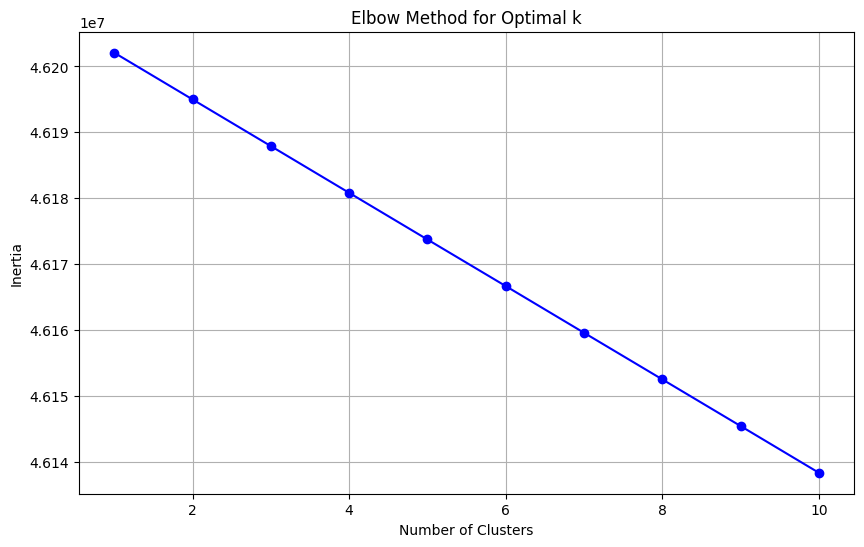

In [14]:
# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


In [ ]:
# Set the optimal number of clusters
optimal_k = 10 # Replace this with the number of clusters determined from the elbow method

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled_df)

# Display the clusters
print(df[['CustomerID', 'Cluster']].head())


   CustomerID  Cluster
0  3668-QPYBK        2
1  9237-HQITU        2
2  9305-CDSKC        2
3  7892-POOKP        2
4  0280-XJGEX        2


KMeans clustering using Principal Component Analysis (PCA)

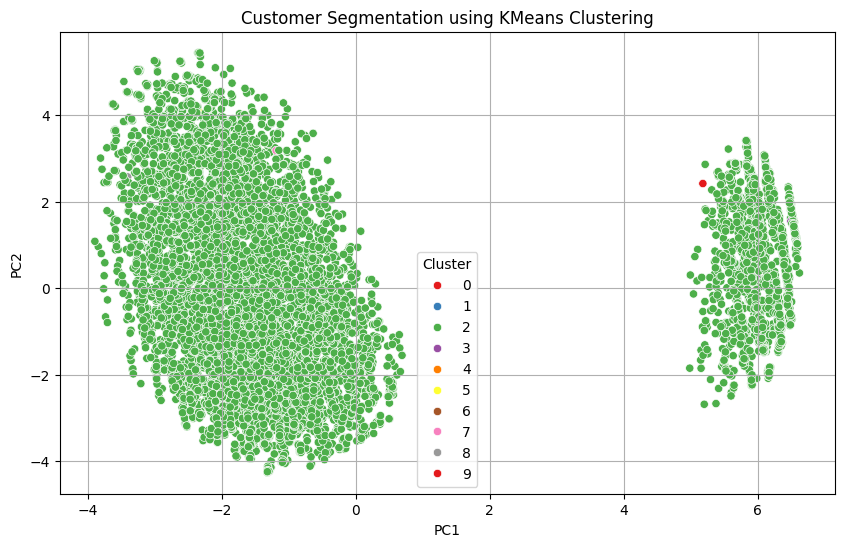

In [ ]:
# Perform PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Customer Segmentation using KMeans Clustering')
plt.grid()
plt.show()


 The customers are clustered into 10 groups, 9 of which are represented in green. One cluster is represented in red, it is separated from other clusters in a different part of the graph. The graph has a clear visual separation between the red cluster and the rest of the clusters, suggesting that this particular group of customers is significantly different from the others. The clusters in green represent a large majority of the data points, and it is likely that this cluster is the most common customer segment. 

aexamining the characteristics of different clusters formed based on various features. First, it calculates and prints the average values of numeric columns for each cluster, providing insights into the typical customer profile in each group. Then, it visualizes the distribution of selected categorical features (like Gender, Senior Citizen status, Partner, and Dependents) across clusters using count plots. Each plot shows the count of customers in each category, differentiated by cluster, and saves these visualizations as PNG files for further analysis. This helps in understanding how different demographic attributes are distributed among the clusters.

Cluster Analysis (Mean of Numeric Columns):
         Count      Zip Code   Latitude   Longitude  Tenure Months  \
Cluster                                                              
0          1.0  94804.000000  37.921034 -122.341798      66.000000   
1          1.0  94337.000000  37.713683 -122.292687      31.500000   
2          1.0  93522.234993  36.281528 -119.796878      32.353058   
3          1.0  94941.000000  37.769297 -121.642246      43.500000   
4          1.0  92072.500000  35.538744 -118.881159       1.500000   
5          1.0  94002.000000  37.509366 -122.306132      72.000000   
6          1.0  93253.500000  35.811876 -120.170370      23.000000   
7          1.0  90049.000000  34.091829 -118.491244      69.000000   
8          1.0  95519.000000  40.965011 -124.015255      70.000000   
9          1.0  90303.000000  33.936291 -118.332639      72.000000   

         Monthly Charges  Churn Value  Churn Score         CLTV  Cluster  
Cluster                                 

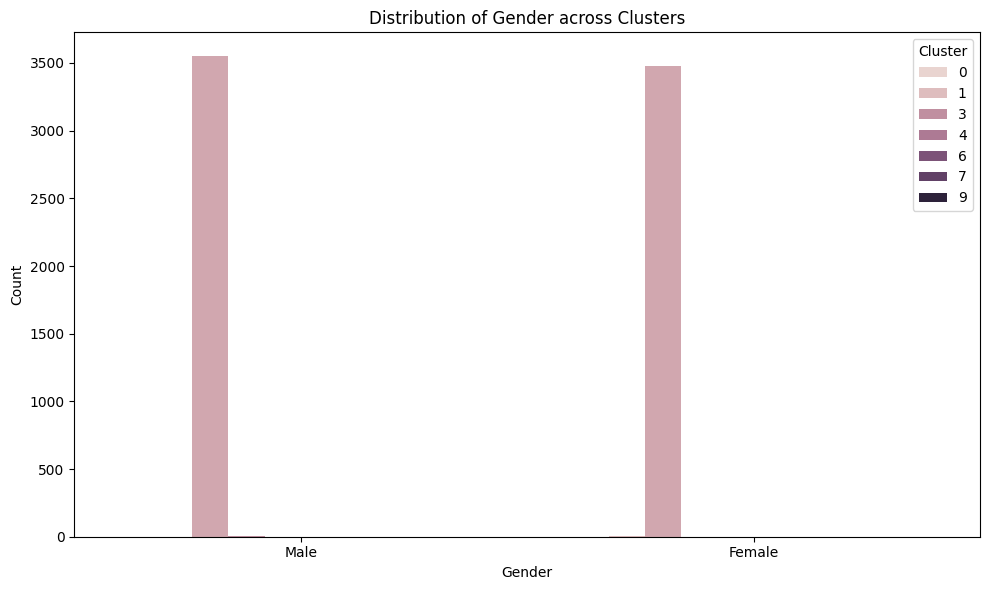

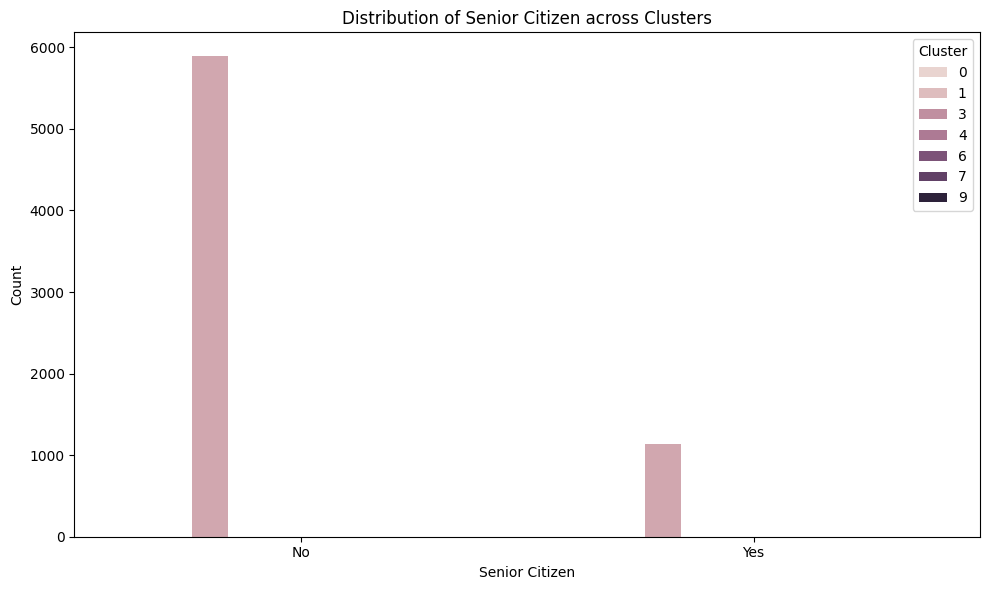

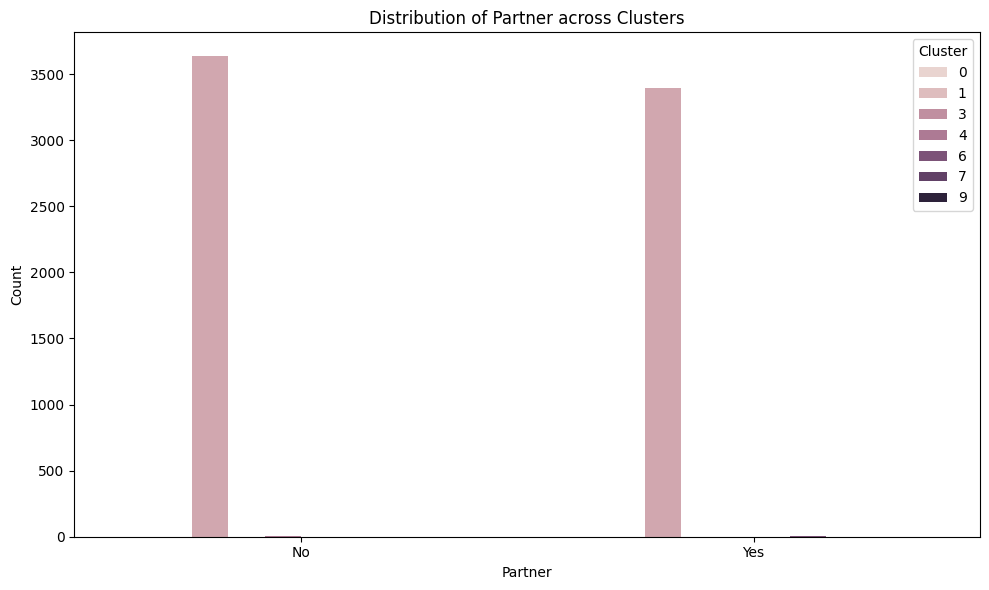

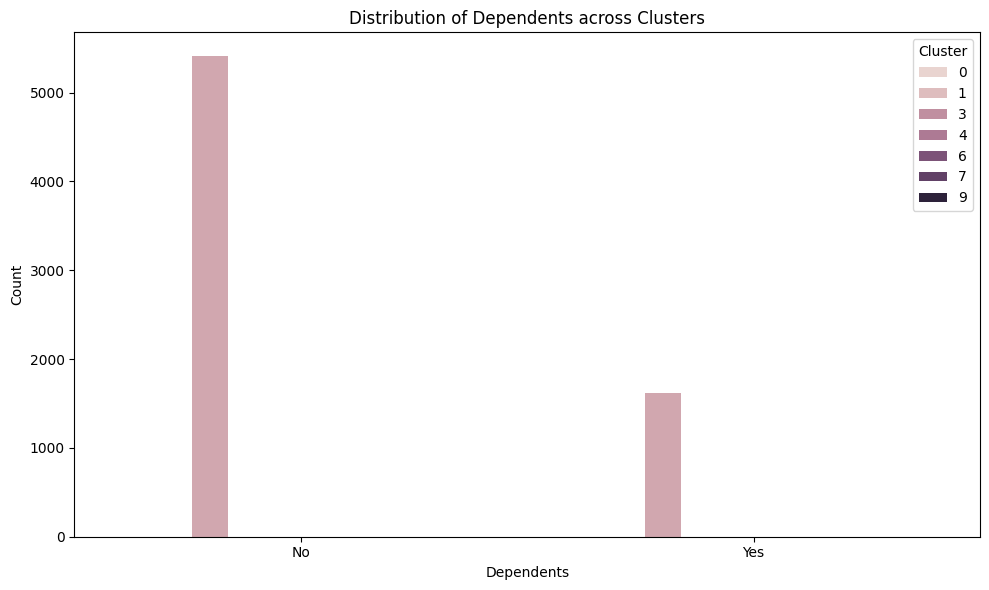

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Analyze cluster characteristics
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()
print("Cluster Analysis (Mean of Numeric Columns):")
print(cluster_analysis)

# Visualize the distribution of categorical features within clusters
categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Specify a figure size
    sns.countplot(data=df, x=col, hue='Cluster')
    plt.title(f'Distribution of {col} across Clusters')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Cluster')
    plt.tight_layout()  # Adjust layout
    plt.savefig(f'distribution_{col}.png')  # Save plot to file
    plt.show()  # Display plot


## Loyalty measures

to categorize customers into loyalty segments based on their cluster assignment and churn status

In [ ]:
# Define loyalty segments
df['Loyalty Segment'] = 'At Risk'  # Default value
df.loc[df['Cluster'] == 0, 'Loyalty Segment'] = 'Loyal'
df.loc[df['Churn Label'] == 'Yes', 'Loyalty Segment'] = 'Churned'

# Display loyalty segments
print(df[['CustomerID', 'Loyalty Segment']].head())


   CustomerID Loyalty Segment
0  3668-QPYBK         Churned
1  9237-HQITU         Churned
2  9305-CDSKC         Churned
3  7892-POOKP         Churned
4  0280-XJGEX         Churned


CLTV and Segments:
      CustomerID    CLTV CLTV Segment Churn Label
0     3668-QPYBK   107.7          Low         Yes
1     9237-HQITU   141.4          Low         Yes
2     9305-CDSKC   797.2          Low         Yes
3     7892-POOKP  2934.4         High         Yes
4     0280-XJGEX  5081.3          Top         Yes
...          ...     ...          ...         ...
7038  2569-WGERO  1522.8       Medium          No
7039  6840-RESVB  2035.2         High          No
7040  2234-XADUH  7430.4          Top          No
7041  4801-JZAZL   325.6          Low          No
7042  3186-AJIEK  6972.9          Top          No

[7043 rows x 4 columns]

Churn Risk by CLTV Segment:
Churn Label         No       Yes
CLTV Segment                    
Low           0.630652  0.369348
Medium        0.790916  0.209084
High          0.714939  0.285061
Very High     0.811490  0.188510
Top           0.854103  0.145897


C:\Users\Sujan.S\AppData\Local\Temp\ipykernel_15068\682947714.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_analysis = df.groupby('CLTV Segment')['Churn Label'].value_counts(normalize=True).unstack()


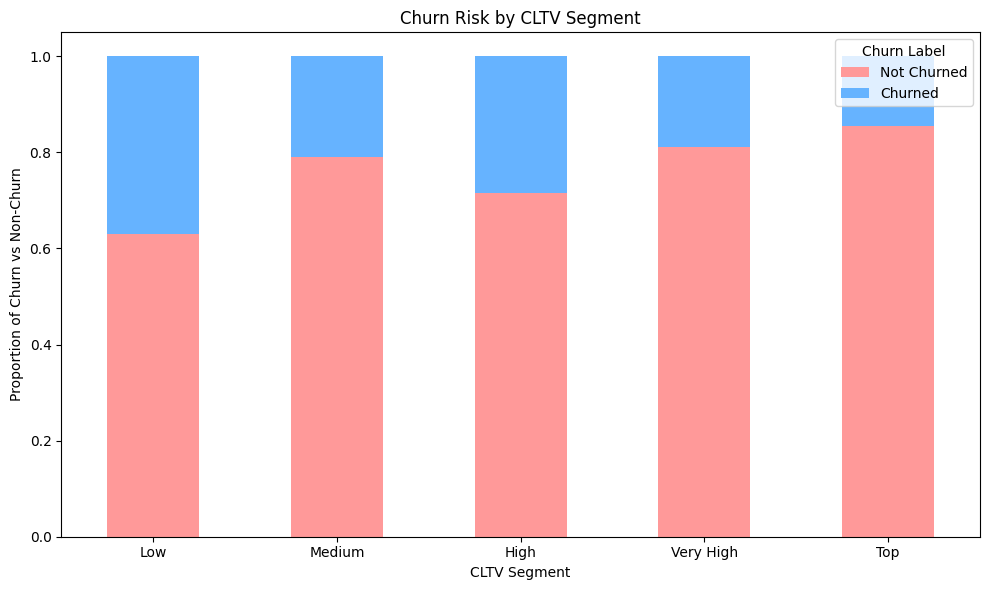

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CLTV Calculation
df['CLTV'] = df['Monthly Charges'] * df['Tenure Months']

# Segmenting customers based on CLTV
cltv_bins = pd.cut(df['CLTV'], bins=[0, 1000, 2000, 3000, 4000, np.inf], labels=['Low', 'Medium', 'High', 'Very High', 'Top'])
df['CLTV Segment'] = cltv_bins

# Display the CLTV and segments
print("CLTV and Segments:")
print(df[['CustomerID', 'CLTV', 'CLTV Segment', 'Churn Label']])

# Analyze CLTV vs. Churn Risk
churn_analysis = df.groupby('CLTV Segment')['Churn Label'].value_counts(normalize=True).unstack()
print("\nChurn Risk by CLTV Segment:")
print(churn_analysis)

# Visualize CLTV vs Churn Risk
plt.figure(figsize=(10, 6))
churn_analysis.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], ax=plt.gca())
plt.title('Churn Risk by CLTV Segment')
plt.xlabel('CLTV Segment')
plt.ylabel('Proportion of Churn vs Non-Churn')
plt.legend(title='Churn Label', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('cltv_churn_analysis.png')  # Save plot to file
plt.show()  # Display plot


In [ ]:
import pandas as pd


# Step 1: Filter for customers who have not churned
loyal_customers = df[df['Churn Label'] == 'No']

# Step 2: Set a threshold for loyalty (e.g., Tenure > 12 months)
loyal_customers = loyal_customers[loyal_customers['Tenure Months'] > 12]

# Step 3: Check for customers using multiple services
# Assuming "Phone Service", "Internet Service", etc. are columns indicating service usage
loyal_customers = loyal_customers[
    (loyal_customers['Phone Service'] == 'Yes') |
    (loyal_customers['Internet Service'] != 'No') |
    (loyal_customers['Streaming TV'] == 'Yes') |
    (loyal_customers['Streaming Movies'] == 'Yes')
]

# Optional: Create a loyalty score based on tenure and monthly charges
loyal_customers['Loyalty Score'] = (loyal_customers['Tenure Months'] / 12) * (1 / loyal_customers['Monthly Charges'])

# Step 4: Display loyal customers
print(loyal_customers[['CustomerID', 'Tenure Months', 'Monthly Charges', 'Loyalty Score']])


      CustomerID  Tenure Months  Monthly Charges  Loyalty Score
1870  5575-GNVDE             34            56.95       0.049751
1871  7795-CFOCW             45            42.30       0.088652
1872  1452-KIOVK             22            89.10       0.020576
1874  6388-TABGU             62            56.15       0.092015
1875  9763-GRSKD             13            49.95       0.021688
...          ...            ...              ...            ...
7036  8456-QDAVC             19            78.70       0.020119
7038  2569-WGERO             72            21.15       0.283688
7039  6840-RESVB             24            84.80       0.023585
7040  2234-XADUH             72           103.20       0.058140
7042  3186-AJIEK             66           105.65       0.052059

[4025 rows x 4 columns]


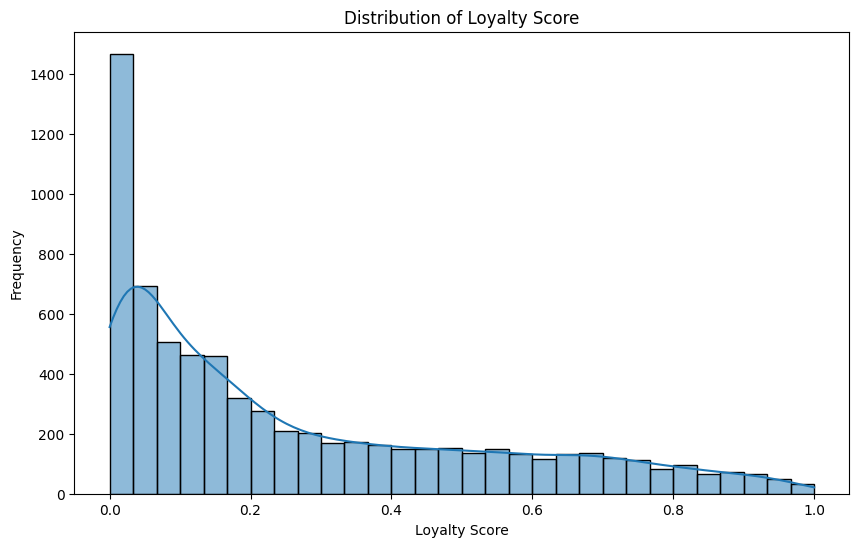

C:\Users\Sujan.S\AppData\Local\Temp\ipykernel_15068\1522524387.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loyalty_vs_churn, x='Loyalty Segment', y='Churn Risk', palette='viridis')


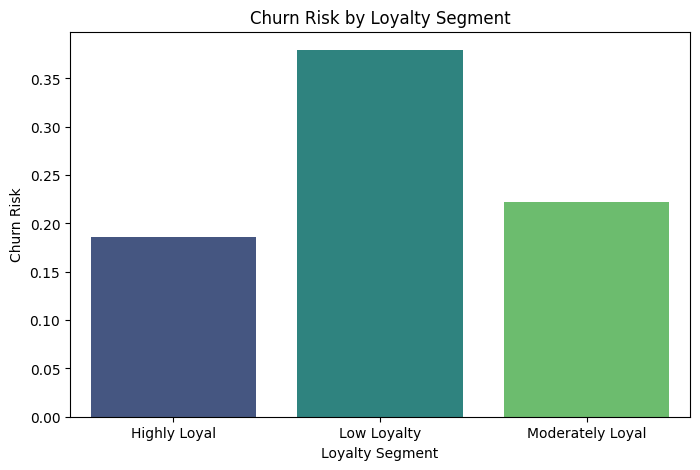

    Loyalty Segment  Tenure Months  Monthly Charges
0      Highly Loyal      51.825589        84.322788
1       Low Loyalty       8.668670        47.711758
2  Moderately Loyal      33.961259        51.788297


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your DataFrame)
# Assuming your DataFrame is named df and already contains 'CustomerID', 'Tenure Months', 'Monthly Charges', and 'Churn Value'

# Step 1: Calculate the Loyalty Score
# Normalize by dividing by the maximum value of the product of tenure and charges
df['Loyalty Score'] = (df['Tenure Months'] * df['Monthly Charges']) / (df['Tenure Months'] * df['Monthly Charges']).max()

# Step 2: Define loyalty segments based on Loyalty Score
def loyalty_segment(score):
    if score >= 0.2:
        return 'Highly Loyal'
    elif 0.1 <= score < 0.2:
        return 'Moderately Loyal'
    else:
        return 'Low Loyalty'

df['Loyalty Segment'] = df['Loyalty Score'].apply(loyalty_segment)

# Step 3: Analyze Loyalty Score with Churn Risk
# Assuming 'Churn Value' column (1 for churned, 0 for loyal)
loyalty_vs_churn = df.groupby('Loyalty Segment')['Churn Value'].mean().reset_index()
loyalty_vs_churn.columns = ['Loyalty Segment', 'Churn Risk']

# Plotting Loyalty Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Loyalty Score'], bins=30, kde=True)
plt.title('Distribution of Loyalty Score')
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency')
plt.show()

# Plotting Churn Risk across Loyalty Segments
plt.figure(figsize=(8, 5))
sns.barplot(data=loyalty_vs_churn, x='Loyalty Segment', y='Churn Risk', palette='viridis')
plt.title('Churn Risk by Loyalty Segment')
plt.xlabel('Loyalty Segment')
plt.ylabel('Churn Risk')
plt.show()

# Additional Analysis: Average Tenure and Monthly Charges per Loyalty Segment
segment_analysis = df.groupby('Loyalty Segment')[['Tenure Months', 'Monthly Charges']].mean().reset_index()
print(segment_analysis)


In [ ]:
import pandas as pd

# Sample data (replace with your actual DataFrame)
# Assuming your DataFrame is named df and already contains 'CustomerID', 'Tenure Months', and 'Monthly Charges'

# Step 1: Calculate the Loyalty Score
df['Loyalty Score'] = (df['Tenure Months'] * df['Monthly Charges']) / (df['Tenure Months'] * df['Monthly Charges']).max()

# Step 2: Define a loyalty threshold (e.g., loyalty score above 0.1 is considered loyal)
loyalty_threshold = 0.1

# Filter for loyal customers based on threshold
loyal_customers = df[df['Loyalty Score'] > loyalty_threshold]

# Display loyal customers
print("List of Loyal Customers:")
print(loyal_customers[['CustomerID', 'Tenure Months', 'Monthly Charges', 'Loyalty Score']])

# Count of loyal customers
num_loyal_customers = loyal_customers.shape[0]
print(f"\nNumber of loyal customers: {num_loyal_customers}")


List of Loyal Customers:
      CustomerID  Tenure Months  Monthly Charges  Loyalty Score
3     7892-POOKP             28           104.80       0.343205
4     0280-XJGEX             49           103.70       0.594304
8     6467-CHFZW             47            99.35       0.546135
10    8773-HHUOZ             17            64.70       0.128643
12    5380-WJKOV             34           106.35       0.422912
...          ...            ...              ...            ...
7036  8456-QDAVC             19            78.70       0.174889
7038  2569-WGERO             72            21.15       0.178105
7039  6840-RESVB             24            84.80       0.238035
7040  2234-XADUH             72           103.20       0.869053
7042  3186-AJIEK             66           105.65       0.815544

[4380 rows x 4 columns]

Number of loyal customers: 4380


In [19]:
print(df.dtypes)


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


In [20]:
# Example: Using one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Partner', 'Dependents', 'Senior Citizen'], drop_first=True)

# Assuming 'Churn Value' is your target column
df_encoded['Churn Value'] = df_encoded['Churn Value'].map({'Yes': 1, 'No': 0})

# Define features and target variable again
X = df_encoded.drop(columns=['Churn Value'])
y = df_encoded['Churn Value']


## AUC

Initial DataFrame shape: (7043, 33)
Missing values in the DataFrame before any processing:
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64
Rows after dropping NaN in 'Churn Valu

c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:26:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cp

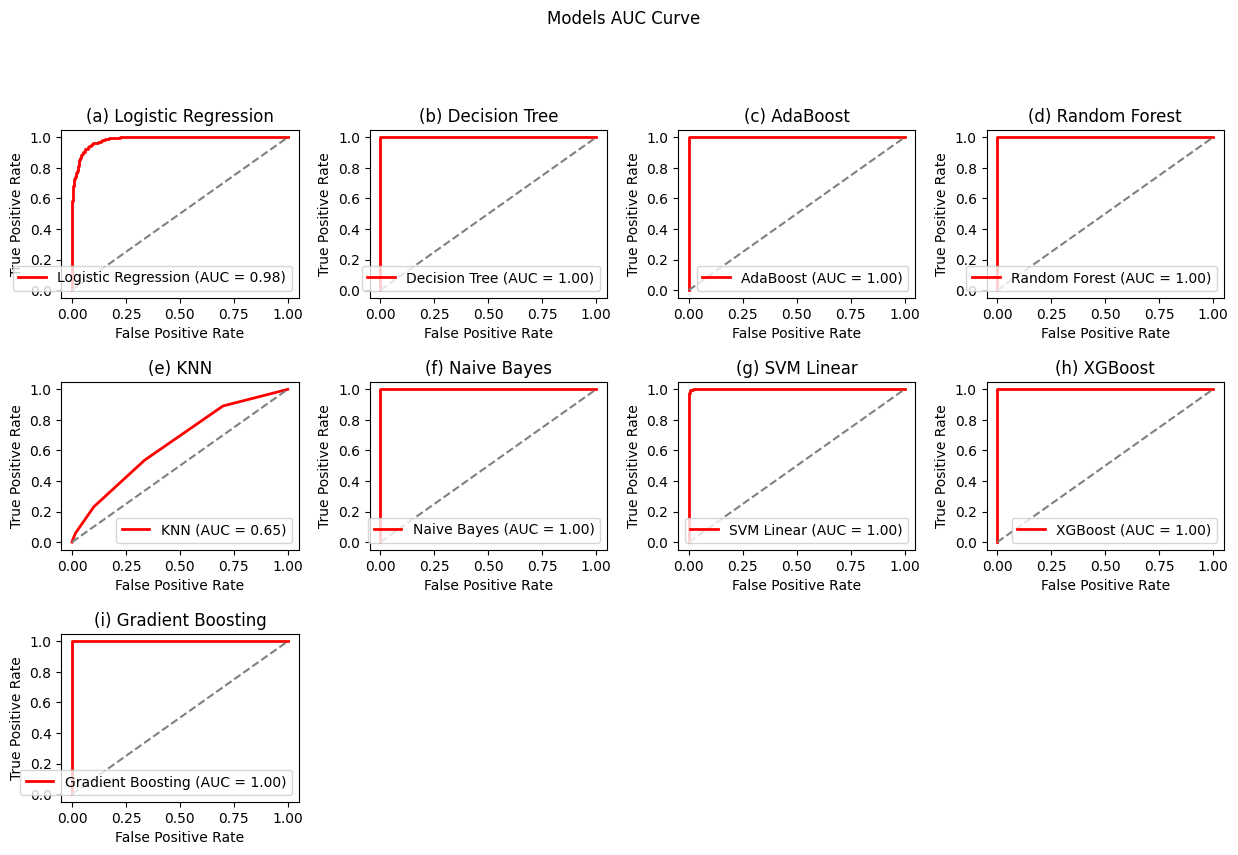

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load your data into df (make sure this is done)
# df = pd.read_csv('your_file.csv')

# Check initial shape of the DataFrame
print("Initial DataFrame shape:", df.shape)

# Check for missing values in the entire DataFrame
print("Missing values in the DataFrame before any processing:")
print(df.isnull().sum())

# Drop rows with missing values in the target column
df.dropna(subset=['Churn Value'], inplace=True)
print(f"Rows after dropping NaN in 'Churn Value': {df.shape[0]}")

# Check for missing values again after dropping
print("Missing values in the DataFrame after dropping NaNs in target:")
print(df.isnull().sum())

# Encode categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df.drop(columns=['CustomerID'], errors='ignore'), drop_first=True)

# Check the shape after encoding
print(f"Shape after encoding: {df_encoded.shape}")

# Ensure 'Churn Value' is numeric
if df_encoded['Churn Value'].dtype == 'object':
    df_encoded['Churn Value'] = df_encoded['Churn Value'].map({'Yes': 1, 'No': 0})

# Verify the conversion
print("Unique values in 'Churn Value':", df_encoded['Churn Value'].unique())

# Define features and target variable
X = df_encoded.drop(columns=['Churn Value'])
y = df_encoded['Churn Value']

# Check shapes and for NaN values in X and y
print("Checking for NaN values in features and target:")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Missing values in features (X):")
print(X.isnull().sum())
print("Missing values in target variable (y):", y.isnull().sum())

# If there are still NaN values in y, drop them
if y.isnull().sum() > 0:
    # Reset indices after dropping NaN values
    df_encoded = df_encoded[~df_encoded['Churn Value'].isnull()]
    y = df_encoded['Churn Value']
    X = df_encoded.drop(columns=['Churn Value'])

# Check for NaN values in features and print shape
print("Final check before train-test split:")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Check if X or y is empty
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Feature matrix X or target vector y is empty. Please check your data cleaning process.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM Linear": make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True)),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Plotting setup
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
i = 1

# Loop over models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.subplot(4, 4, i)
    plt.plot(fpr, tpr, color='red', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'({chr(96+i)}) {name}')
    plt.legend(loc="lower right")
    i += 1

plt.suptitle("Models AUC Curve")
plt.show()


In [16]:
import sklearn
print(sklearn.__version__)


1.4.2


## Model comparison

c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Sujan.S\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:44:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cp

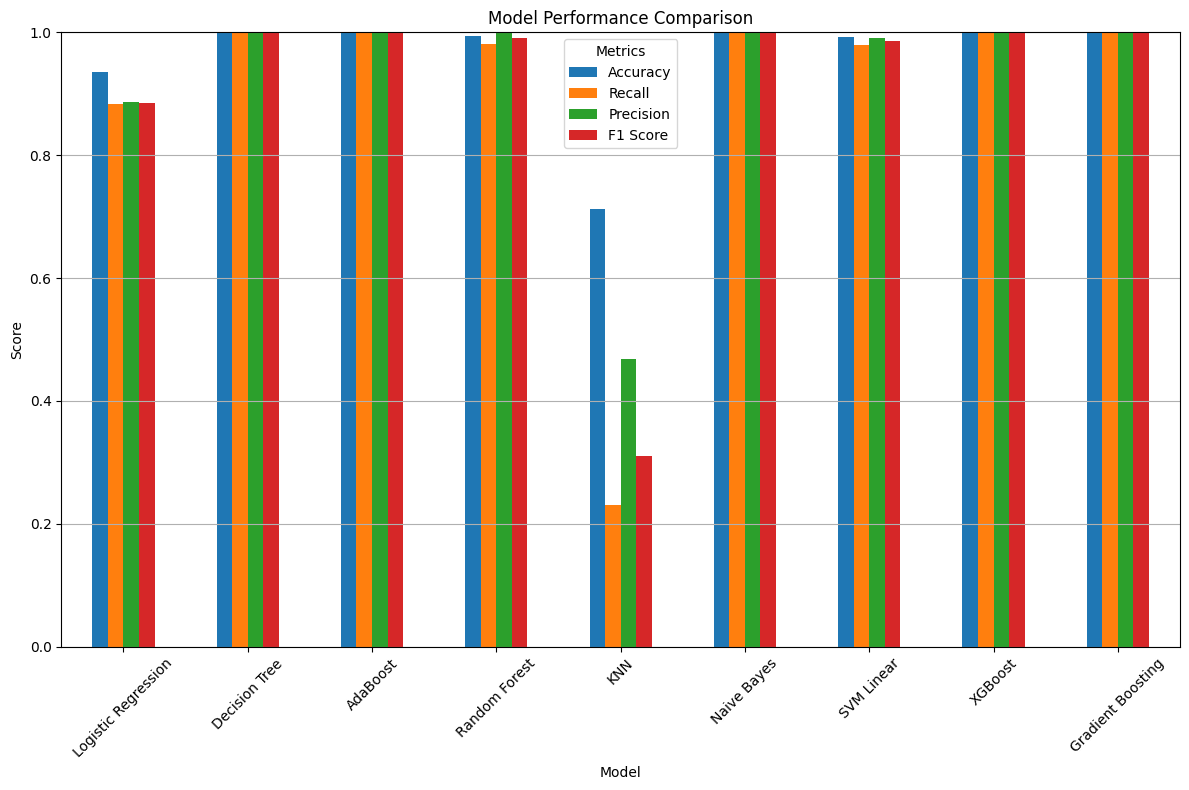

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM Linear": make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True)),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store evaluation metrics
results = {
    "Model": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": [],
    "F1 Score": []
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred))
    results["F1 Score"].append(f1_score(y_test, y_pred))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plotting the performance metrics
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(12, 8))

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
